# Associate Data Scientist - Klasifikasi Decision Tree

- Nama: Dr. Eng. Farrikh Alzami, M.Kom
- Email: alzami@dsn.dinus.ac.id
- Institusi: Sistem Informasi S1 - Fakultas Ilmu Komputer - Universitas Dian Nuswantoro

- dokumen SKKNI: https://lspinformatika.id/pages/page/7  atau https://e-serkom-ng.co.id/assets/uploads/skema/a3ef7-skkni-2020-299.pdf-1-.pdf

## Unit 1: J.62DMI00.004.1 - Mengumpulkan Data
Tujuan: Memahami dataset dan mengumpulkan informasi yang diperlukan.
Langkah-langkah:

1. Unduh Diabetes Binary Dataset dari UCI Machine Learning Repository. URL https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators:

2. Baca deskripsi dataset untuk memahami konteks dan tujuan data.
3. Identifikasi sumber data: dataset ini berasal dari Data Indikator Kesehatan Diabetes.

4. Kenali struktur data:
- Jumlah instance: 253680
- Jumlah atribut: 21 (termasuk target variable)
- Target variable: pasien (diabetes, pradiabetes, atau sehat)


5. Buat daftar atribut dan tipe datanya:
- ID : integer
- Diabetes_binary: binary (target variable)
- HighBP : binary
- HighChol: binary
- CholCheck: binary
- BMI: integer
- Smoker: binary
- Stroke: binary
- HeartDiseaseorAttack: binary
- PhysActivity: binary
- Fruits: binary
- Veggies: binary
- HvyAlcoholConsump: binary
- AnyHealthcare: binary
- NoDocbcCost: binary
- GenHlth: binary
- MentHlth : binary
- PhysHlth: binary
- DiffWalk : binary
- Sex: binary
- Age: integer
- Education : integer
- Income : integer

6. Gunakan Python untuk membaca dataset
7. Catat informasi penting tentang dataset:
- Jumlah baris dan kolom
- Tipe data masing-masing kolom
- Adanya missing values
8. Analisis hasil missing value:
- Identifikasi kolom-kolom dengan missing value
- Pertimbangkan implikasi missing value ini terhadap analisis selanjutnya
9. Dokumentasikan temuan
- Catat jumlah dan persentase missing value untuk setiap kolom
- Buat catatan tentang kemungkinan penyebab missing value (misalnya, data tidak tersedia, kesalahan input, dll.)
10. Rencanakan strategi untuk menangani missing value ini di tahap pembersihan data nanti.

<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">

### Soal 1. Load Dataset

In [ ]:
# Define the variable
folder_name = "/content/drive/My Drive/Lectures/Semester 5/Data Mining/UTS"

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append(f'{folder_name}')

Mounted at /content/drive


### load library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

### baca dataset

In [ ]:
# Baca dataset
#dari folder google drive
df =pd.read_csv(f'/content/drive/My Drive/Lectures/Semester 5/Data Mining/UTS/diabetes_binary_health_indicators_BRFSS2015.csv', sep=',', skipinitialspace=True, na_values="?")

# Tampilkan beberapa baris pertama dan informasi dataset
df.head(10)

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5              0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6              0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7              0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8              1.0     1.0       1.0        1.0  30.0     1.0     0.0   
9              0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   
5                   0.0           1.0     1.0      1.0                0.0   
6                   0.0           0.0     0.0      0.0                0.0   
7                   0.0           1.0     0.0      1.0                0.0   
8                   1.0           0.0     1.0      1.0                0.0   
9                   0.0           0.0     0.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   
5            1.0          0.0      2.0       0.0       2.0       0.0  1.0   
6            1.0          0.0      3.0       0.0      14.0       0.0  0.0   
7            1.0          0.0      3.0       0.0       0.0       1.0  0.0   
8            1.0          0.0      5.0      30.0      30.0       1.0  0.0   
9            1.0          0.0      2.0       0.0       0.0       0.0  1.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0  
5  10.0        6.0     8.0  
6   9.0        6.0     7.0  
7  11.0        4.0     4.0  
8   9.0        5.0     1.0  
9   8.0        4.0     3.0

### baca informasi dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Soal 2. Masukkan Nama Fitur ke Dataset

In [ ]:
df =pd.read_csv(f'/content/drive/My Drive/Lectures/Semester 5/Data Mining/UTS/diabetes_binary_health_indicators_BRFSS2015.csv', sep=',', skipinitialspace=True, na_values="?")

column_names = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
                'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
                'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
                'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
                'Sex', 'Age', 'Education', 'Income']

df.columns = column_names

df.head(10)

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5              0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6              0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7              0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8              1.0     1.0       1.0        1.0  30.0     1.0     0.0   
9              0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   
5                   0.0           1.0     1.0      1.0                0.0   
6                   0.0           0.0     0.0      0.0                0.0   
7                   0.0           1.0     0.0      1.0                0.0   
8                   1.0           0.0     1.0      1.0                0.0   
9                   0.0           0.0     0.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   
5            1.0          0.0      2.0       0.0       2.0       0.0  1.0   
6            1.0          0.0      3.0       0.0      14.0       0.0  0.0   
7            1.0          0.0      3.0       0.0       0.0       1.0  0.0   
8            1.0          0.0      5.0      30.0      30.0       1.0  0.0   
9            1.0          0.0      2.0       0.0       0.0       0.0  1.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0  
5  10.0        6.0     8.0  
6   9.0        6.0     7.0  
7  11.0        4.0     4.0  
8   9.0        5.0     1.0  
9   8.0        4.0     3.0

### Soal 3. Cek Data yang Kosong

In [ ]:
# Hitung jumlah missing value per kolom
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
# Hitung persentase missing value
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase missing value per kolom:")
print(missing_percentage)


Persentase missing value per kolom:
Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64


## Unit 2: J.62DMI00.005.1 - Menelaah Data
Tujuan: Menganalisis dan memahami karakteristik data yang telah dikumpulkan.
Langkah-langkah:
1. Analisis Statistik Deskriptif
2. Visualisasi Distribusi
3. Analisis Korelasi
4. Analisis Hubungan dengan Target Variable
5. Identifikasi Outlier
6. Analisis dan Interpretasi

lakukan analisis berikut:
1. Statistik Deskriptif:
- Identifikasi rata-rata, median, dan modus untuk variabel numerik
- Perhatikan range dan standar deviasi
- Untuk variabel kategorikal, perhatikan kategori yang paling umum

b. Distribusi Target:
- Apakah kelas target seimbang atau tidak?

c. Visualisasi Distribusi:
- Identifikasi variabel dengan distribusi normal atau skewed
- Perhatikan pola-pola menarik pada variabel kategorikal

d. Korelasi:
- Identifikasi pasangan variabel dengan korelasi tinggi
- Pertimbangkan implikasi multikolinearitas

e. Hubungan dengan Target:
- Identifikasi variabel yang memiliki hubungan kuat dengan target
- Perhatikan perbedaan distribusi antara dua kelas target

f. Outlier:
- Identifikasi variabel dengan outlier signifikan
- Pertimbangkan apakah outlier ini merupakan error atau data valid


Dokumentasi Temuan:
- Buat ringkasan temuan utama dari analisis ini
- Catat insight yang mungkin berguna untuk pemodelan nanti
- Identifikasi area yang memerlukan penyelidikan lebih lanjut

### Analisis Statistik Deskriptif

In [ ]:
# Analisis Statistik Deskriptif

# Statistik deskriptif untuk variabel numerik
df.describe()

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits        Veggies  HvyAlcoholConsump  \
count  253680.000000  253680.000000  253680.000000      253680.000000   
mean        0.756544       0.634256       0.811420           0.056197   
std         0.429169       0.481639       0.391175           0.230302   
min         0.000000       0.000000       0.000000           0.000000   
25%         1.000000       0.000000       1.000000           0.000000   
50%         1.000000       1.000000       1.000000           0.000000   
75%         1.000000       1.000000       1.000000           0.000000   
max         1.000000       1.000000       1.000000           1.000000   

       AnyHealthcare    NoDocbcCost        GenHlth       MentHlth  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.951053       0.084177       2.511392       3.184772   
std         0.215759       0.277654       1.068477       7.412847   
min         0.000000       0.000000       1.000000       0.000000   
25%         1.000000       0.000000       2.000000       0.000000   
50%         1.000000       0.000000       2.000000       0.000000   
75%         1.000000       0.000000       3.000000       2.000000   
max         1.000000       1.000000       5.000000      30.000000   

            PhysHlth       DiffWalk            Sex            Age  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        4.242081       0.168224       0.440342       8.032119   
std         8.717951       0.374066       0.496429       3.054220   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       0.000000       0.000000       6.000000   
50%         0.000000       0.000000       0.000000       8.000000   
75%         3.000000       0.000000       1.000000      10.000000   
max        30.000000       1.000000       1.000000      13.000000   

           Education         Income  
count  253680.000000  253680.000000  
mean        5.050434       6.053875  
std         0.985774       2.071148  
min         1.000000       1.000000  
25%         4.000000       5.000000  
50%         5.000000       7.000000  
75%         6.000000       8.000000  
max         6.000000       8.000000

Penjelasan Statistik Deskriptif untuk Variabel Numerik:
- count: Jumlah data non-null
- mean: Rata-rata
- std: Standar deviasi
- min: Nilai minimum
- 25%: Kuartil pertama (Q1)
- 50%: Median atau kuartil kedua (Q2)
- 75%: Kuartil ketiga (Q3)
- max: Nilai maksimum


Penjelasan untuk beberapa variabel kunci:

a. HighBP (Tekanan Darah Tinggi)
  - Mean: RRata-rata proporsi individu yang dilaporkan memiliki tekanan darah tinggi.
  - Std: Penyebaran dari proporsi tekanan darah tinggi dalam populasi, menunjukkan seberapa banyak variasi yang ada.
  - Min dan Max: Nilai minimum dan maksimum untuk kolom ini, mengindikasikan proporsi

b. HighChol (Kolesterol Tinggi)
  - Mean: Rata-rata proporsi individu yang melaporkan memiliki kolesterol tinggi.
  - Std: Variasi dalam kolesterol tinggi di antara individu dalam dataset
  - Min dan Max: Rentang nilai dari proporsi kolesterol tinggi, menunjukkan individu dengan kadar kolesterol terendah hingga tertinggi.

c. BMI (Body Mass Index):
  - Mean: Rata-rata nilai BMI dalam populasi, yang mencerminkan status gizi dan obesitas.
  - Std: Mengukur penyebaran nilai BMI dari rata-rata.
  - Min dan Max: Nilai BMI terendah dan tertinggi yang dilaporkan dalam dataset.

d. PhysActivity (Aktivitas Fisik):

  - Mean: Rata-rata jumlah individu yang melakukan aktivitas fisik.
  - Std: Variasi dalam laporan aktivitas fisik dalam populasi.
  - Min dan Max: Rentang nilai dari individu yang aktif secara fisik, dari yang terendah hingga tertinggi.

e. Fruits:

  - Mean: Rata-rata proporsi individu yang mengonsumsi buah.
  - Min dan Max: Jam kerja terendah dan tertinggi dalam dataset.
  - Min dan Max: Rentang dari proporsi individu yang mengonsumsi buah, menunjukkan yang paling rendah dan tertinggi.

f. Veggies:

   - Mean: Rata-rata proporsi individu yang mengonsumsi sayuran.
   - Std: Penyebaran dalam konsumsi sayuran di antara individu dalam dataset.
   - Min dan Max: Rentang nilai untuk proporsi individu yang mengonsumsi sayuran.

g. Smoker (Perokok):

  - Mean: Rata-rata proporsi individu yang dilaporkan sebagai perokok.
  - Std: Variasi dalam proporsi perokok dalam populasi.
  - Min dan Max: Nilai terendah dan tertinggi dari proporsi perokok yang dilaporkan.

h. GenHlth (Kesehatan Umum):

   - Mean: Rata-rata penilaian kesehatan umum yang dilaporkan oleh individu.
   - Std: Penyebaran nilai kesehatan umum dalam populasi.
   - Min dan Max: Rentang nilai dari penilaian kesehatan umum terendah hingga tertinggi.

i. Age (Usia):

   - Mean: Rata-rata usia individu dalam dataset, memberikan gambaran demografis.
   - Std: Variasi usia di sekitar rata-rata, menunjukkan seberapa beragam usia individu.
   - Min dan Max: Usia terendah dan tertinggi dalam dataset, menunjukkan rentang usia populasi.

j. HeartDiseaseorAttack (Penyakit Jantung atau Serangan):

  - Mean: Rata-rata proporsi individu yang dilaporkan memiliki penyakit jantung atau telah mengalami serangan jantung.
  - Std: Penyebaran dalam laporan penyakit jantung dalam populasi.
  - Min dan Max: Rentang nilai dari proporsi individu yang mengalami penyakit jantung atau serangan.

### Soal 7. Cek Fitur Bertipe Kategorikal

In [101]:
# Statistik deskriptif untuk variabel kategorikal
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features

[]

### Soal 8. Konversikan Nilai Kategorikal ke Ordinal

In [100]:
from sklearn.preprocessing import LabelEncoder

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

Penjelasan Statistik Deskriptif untuk Variabel Kategorikal:
- count: Jumlah data non-null
- unique: Jumlah kategori unik
- top: Kategori yang paling sering muncul
- freq: Frekuensi dari kategori yang paling sering muncul

Penjelasan untuk beberapa variabel kunci:
-workclass:

  - Unique: Berapa banyak jenis kelas pekerja yang berbeda
  - Top: Jenis pekerjaan yang paling umum
  - Freq: Seberapa sering jenis pekerjaan yang paling umum muncul

- education:

  - Unique: Jumlah tingkat pendidikan yang berbeda
  - Top: Tingkat pendidikan yang paling umum

- marital_status:

  - Unique: Jumlah status pernikahan yang berbeda
  - Top: Status pernikahan yang paling umum

- occupation:

  - Unique: Jumlah jenis pekerjaan yang berbeda
  - Top: Jenis pekerjaan yang paling umum

- race dan sex:

  - Unique: Jumlah kategori untuk masing-masing
  - Top: Kategori yang paling dominan

- native_country:

  - Unique: Jumlah negara asal yang berbeda
  - Top: Negara asal yang paling umum

### distribusi target variable

In [ ]:
# Distribusi target variable
df['Diabetes_binary'].value_counts(normalize=True)

Diabetes_binary
0.0    0.860667
1.0    0.139333
Name: proportion, dtype: float64

penjelasan:
- Distribusi Kelas:
  - 75.919% dari sampel memiliki pendapatan ≤ $50,000 per tahun.
  - 24.081% dari sampel memiliki pendapatan > $50,000 per tahun.
- Ketidakseimbangan Kelas (Class Imbalance):
  - Dataset ini menunjukkan ketidakseimbangan kelas yang cukup signifikan.
  - Rasio antara kelas mayoritas (<=50K) dan kelas minoritas (>50K) adalah sekitar 3:1.

Implikasi untuk Analisis dan Pemodelan:
- Representasi Populasi:

  - Mayoritas individu dalam dataset termasuk dalam kategori pendapatan yang lebih rendah.
  - Ini mungkin mencerminkan distribusi pendapatan yang umum dalam populasi pada saat data dikumpulkan (1994).

- Pemilihan Metrik Evaluasi:

  - Akurasi saja mungkin tidak cukup sebagai metrik evaluasi karena bisa menyesatkan dalam kasus data yang tidak seimbang.
  - Metrik seperti precision, recall, F1-score, atau AUC-ROC mungkin lebih informatif.

  - Teknik Sampling:

  - Mungkin perlu mempertimbangkan teknik seperti oversampling kelas minoritas (misalnya dengan SMOTE) atau undersampling kelas mayoritas untuk menyeimbangkan dataset.

  - Pemilihan Algoritma:

  - Beberapa algoritma, seperti Random Forest atau Gradient Boosting, cenderung lebih baik dalam menangani ketidakseimbangan kelas (**disini, kita akan menggunakan decision tree**)
  - Untuk algoritma yang sensitif terhadap ketidakseimbangan (seperti Logistic Regression), mungkin perlu penyesuaian seperti penambahan class weights.

- Interpretasi Hasil:

  - Penting untuk mempertimbangkan baseline model (misalnya, selalu memprediksi kelas mayoritas akan memberikan akurasi 75.919%).
  - Peningkatan kecil dalam performa mungkin sudah signifikan mengingat ketidakseimbangan ini.

- Analisis Bisnis:

  - Mungkin perlu mempertimbangkan cost-sensitive learning jika kesalahan prediksi pada salah satu kelas lebih mahal atau berisiko.(**disini, kita akan menggunakan decision tree**)

- Feature Engineering:

  - Mungkin ada fitur-fitur tertentu yang sangat prediktif untuk kelas minoritas (>50K) yang perlu dieksplorasi lebih lanjut.


- Konteks Sosio-ekonomi:

  - Distribusi ini mencerminkan ketimpangan pendapatan pada saat itu.
Bisa menjadi dasar untuk analisis lebih lanjut tentang faktor-faktor yang mempengaruhi pendapatan tinggi.


- Validasi dan Generalisasi:

  - Perlu diingat bahwa data ini dari tahun 1994, sehingga mungkin tidak mencerminkan distribusi pendapatan saat ini.
  - Jika menggunakan model ini untuk prediksi modern, perlu mempertimbangkan perubahan ekonomi dan sosial sejak data dikumpulkan.

### Soal 6 Visualisasi 17 Fitur dengan Barchart

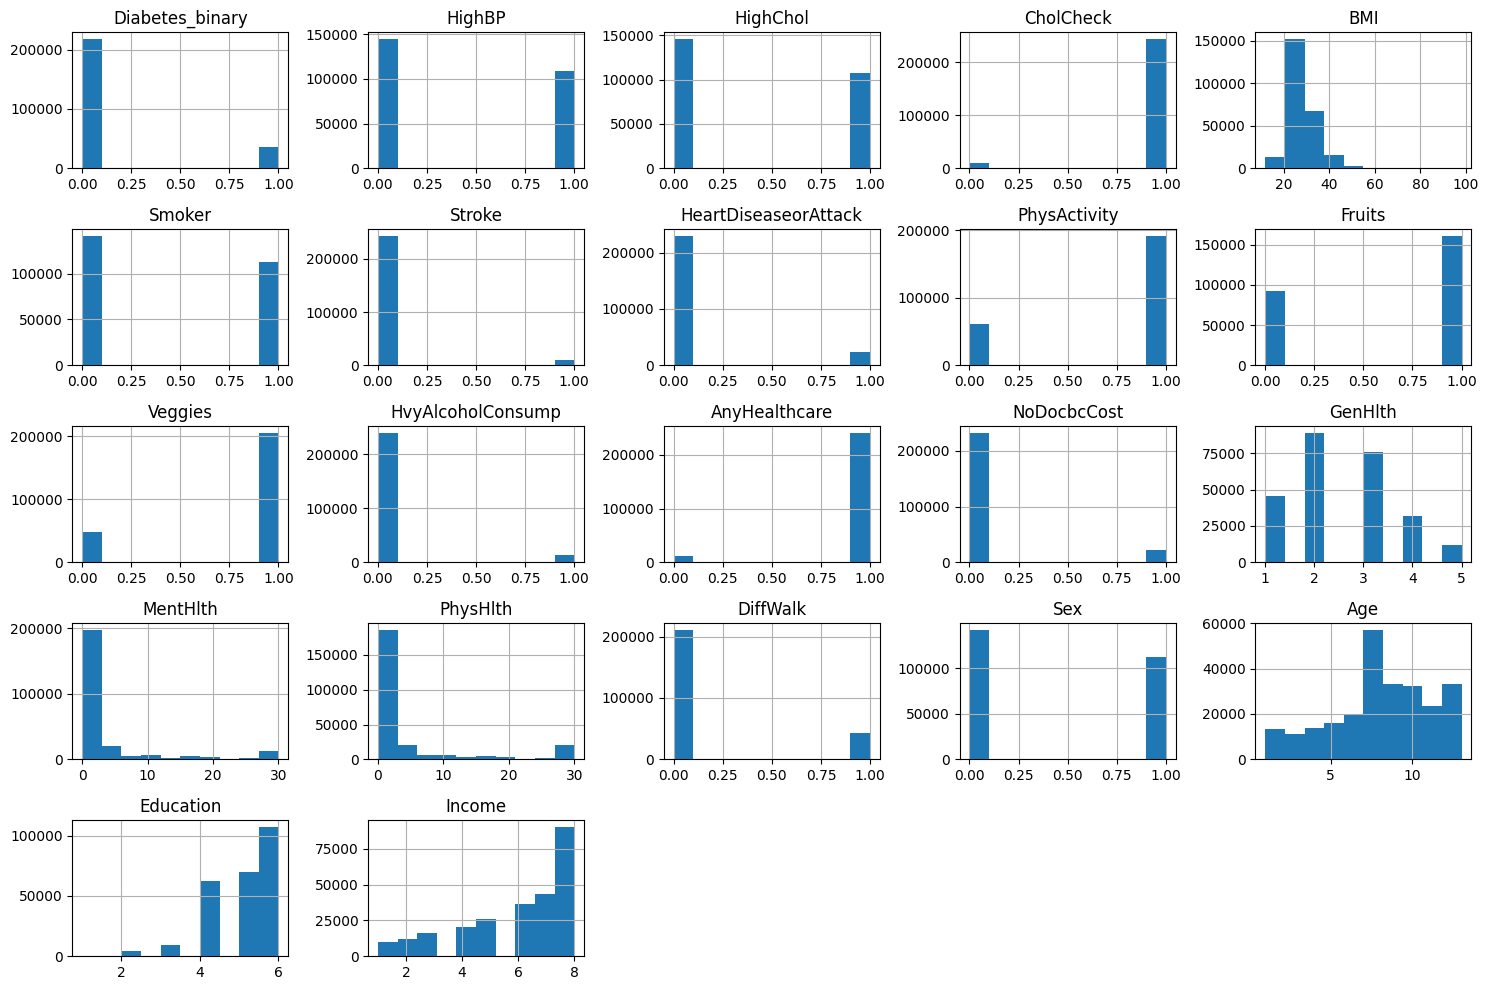

In [ ]:
# Histogram untuk variabel numerik
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
# Bar plot untuk variabel kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

### visualisasi distribusi dengan target


In [ ]:
# Countplot untuk variabel kategorikal dengan hue=classification
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    if feature != 'iDiabetes_binary':  # Hindari membuat plot untuk kolom classification itu sendiri
        plt.figure(figsize=(12, 6))

        # Gunakan .value_counts() untuk menghitung frekuensi
        value_counts = df.groupby([feature, 'Diabetes_binary']).size().unstack(fill_value=0)

        # Plot menggunakan barplot alih-alih countplot
        sns.barplot(x=value_counts.index, y=value_counts.iloc[:, 0], color='blue', label=value_counts.columns[0])
        sns.barplot(x=value_counts.index, y=value_counts.iloc[:, 1], color='orange', label=value_counts.columns[1])

        plt.title(f'Distribution of {feature} by Diabetes_binary')
        plt.ylabel('Count')
        plt.xlabel(feature)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Diabetes_binary', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

In [ ]:
# Countplot untuk variabel kategorikal dengan hue=income
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    if feature != 'Diabetes_binary':  # Hindari membuat plot untuk kolom classification itu sendiri
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=feature, hue='Diabetes_binary')
        plt.title(f'Distribution of {feature} by Diabetes_binary')
        plt.ylabel('Count')
        plt.xlabel(feature)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Diabetes_binary', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

### Soal 9. Cek korelasi

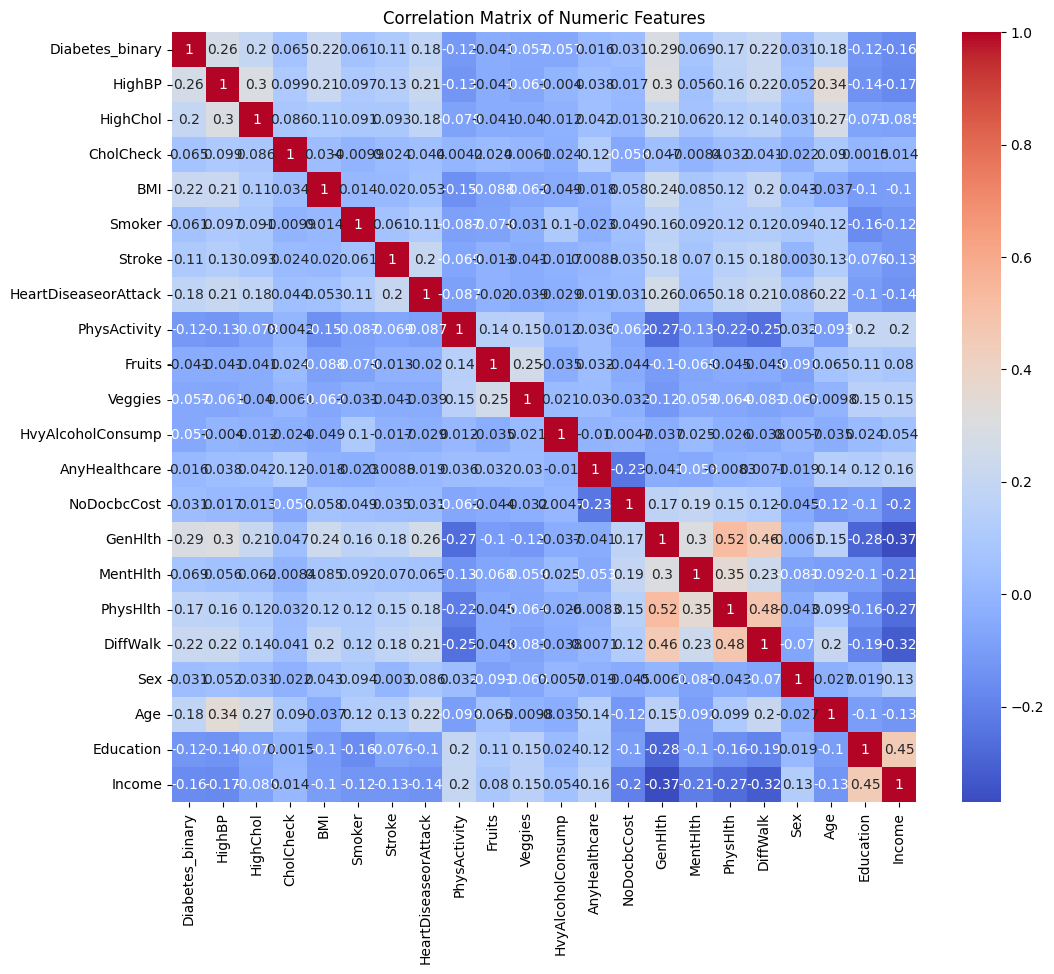

In [ ]:
# Korelasi antara variabel numerik
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

catatan:

Observasi Utama:

- Sebagian besar korelasi antar variabel sangat lemah (warna biru muda)
- Tidak ada korelasi yang sangat kuat antar variabel (tidak ada warna merah tua selain diagonal)

Korelasi Spesifik:

- Korelasi tertinggi adalah antara 'education_num' dan 'hours_per_week' (0.15)
- 'age' memiliki korelasi lemah positif dengan 'capital_gain' (0.078)
- 'fnlwgt' memiliki korelasi sangat lemah dengan semua variabel lain

Implikasi:

- Multikolinearitas tidak menjadi masalah besar dalam dataset ini
Setiap variabel cenderung memberikan informasi yang unik
Decision tree mungkin perlu mempertimbangkan interaksi antar variabel

*Multikolinearitas adalah sebuah situasi yang menunjukkan adanya korelasi kuat antara dua variabel bebas atau lebih

Insight untuk Modeling:
- Feature selection (mungkin) tidak terlalu efektif karena rendahnya korelasi

### Analisis Hubungan dengan Target Variable

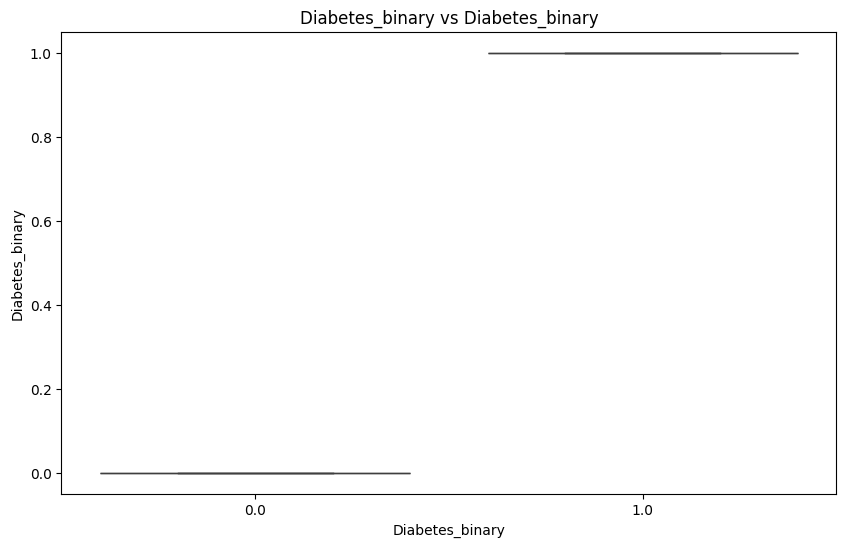

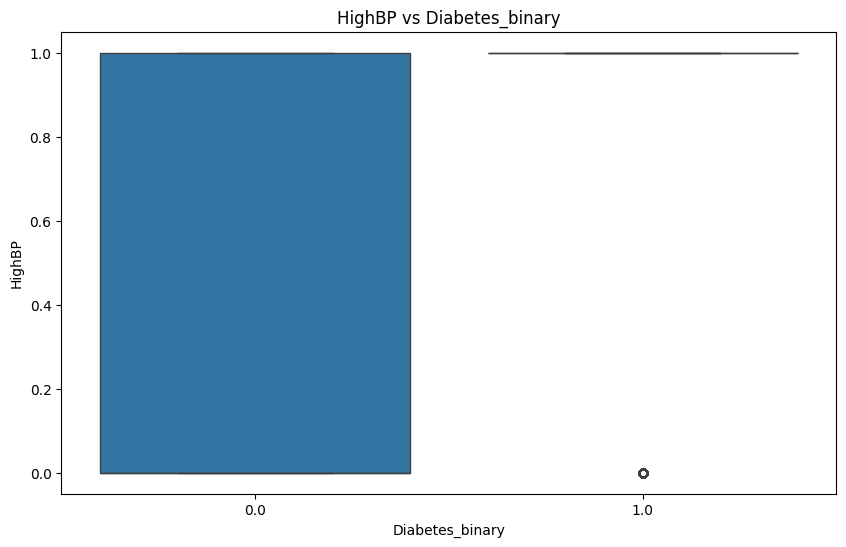

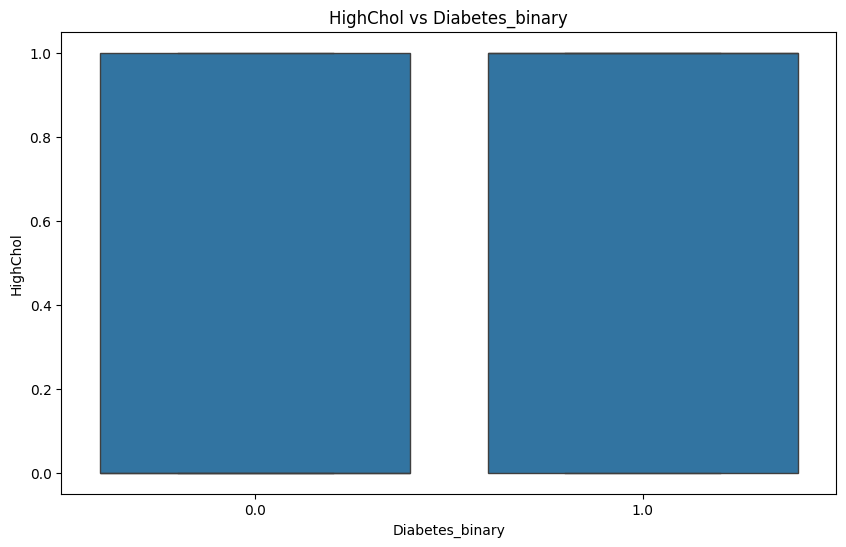

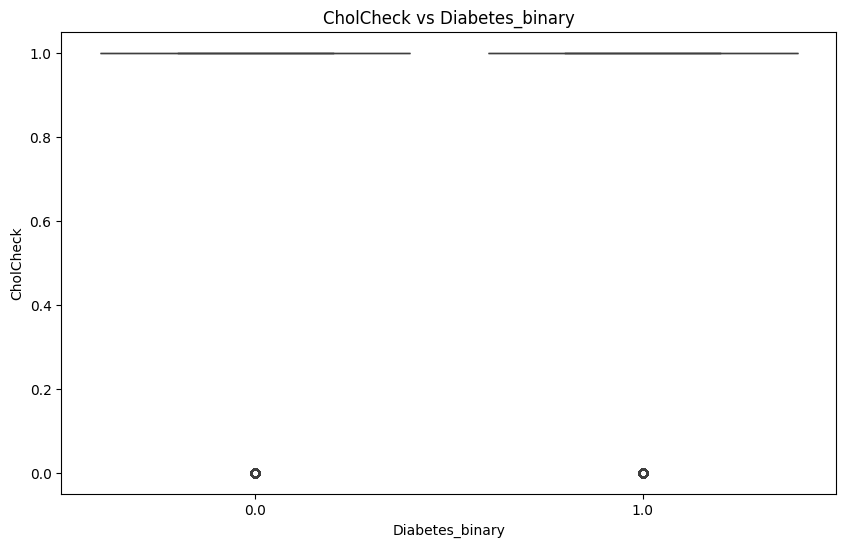

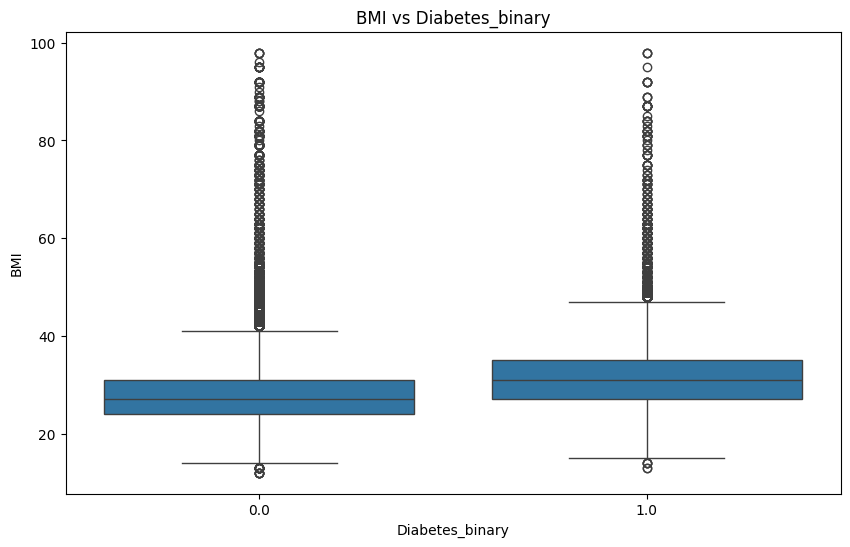

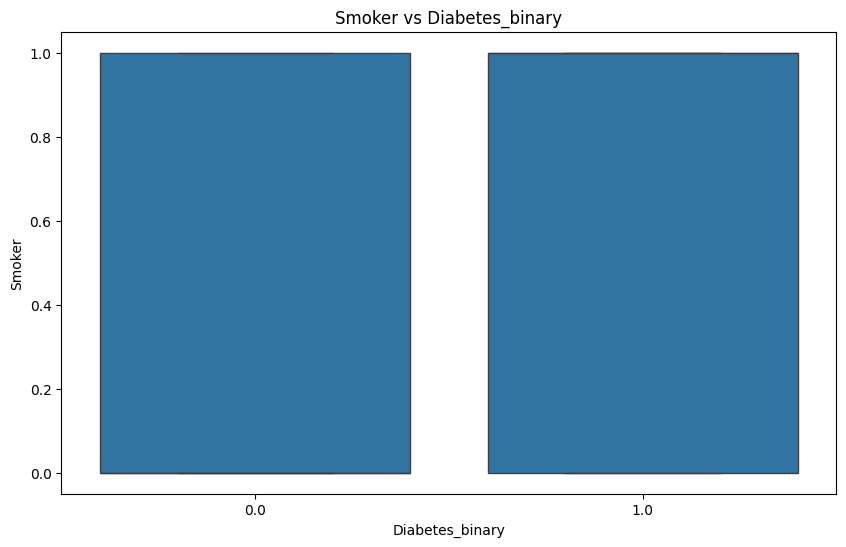

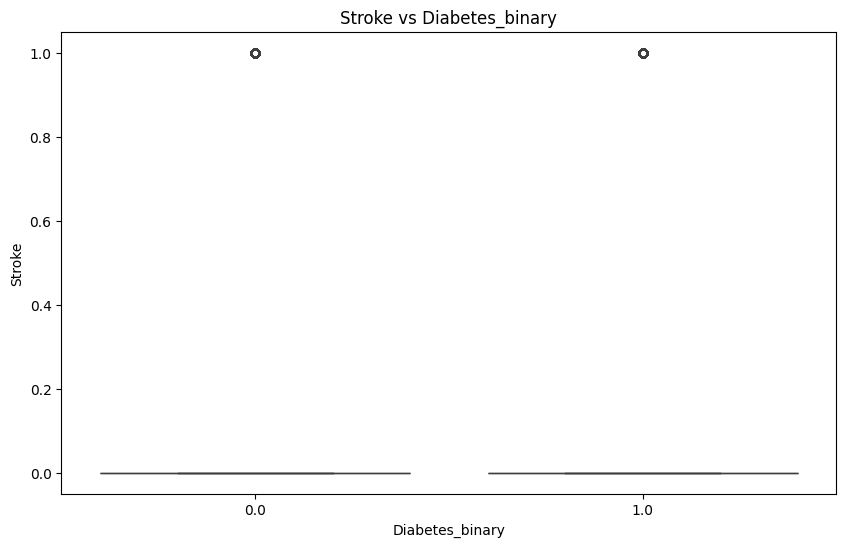

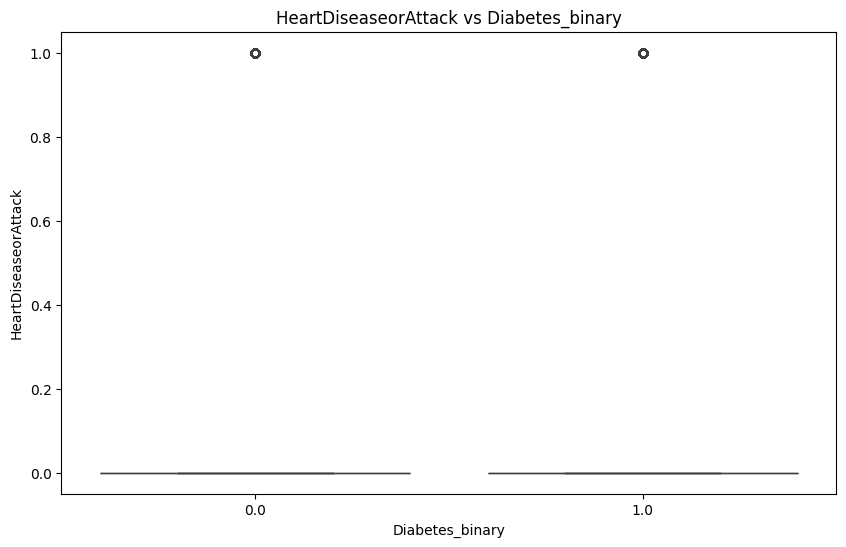

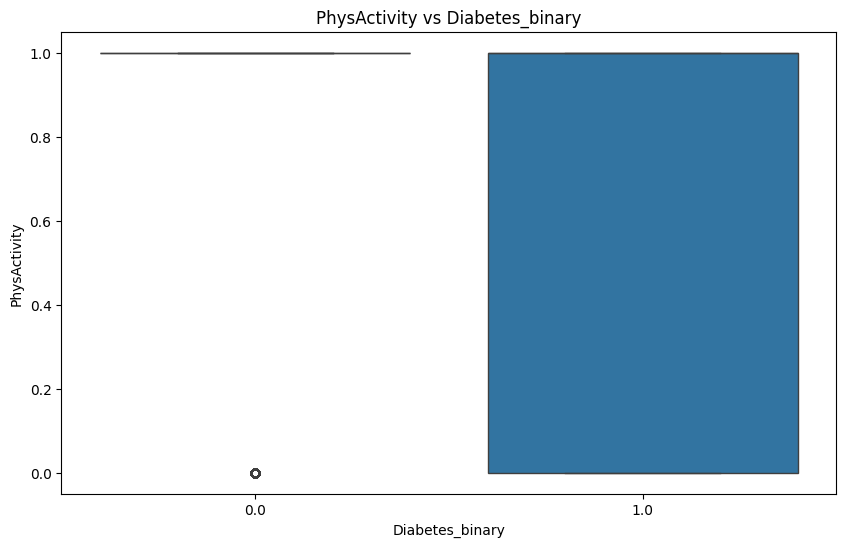

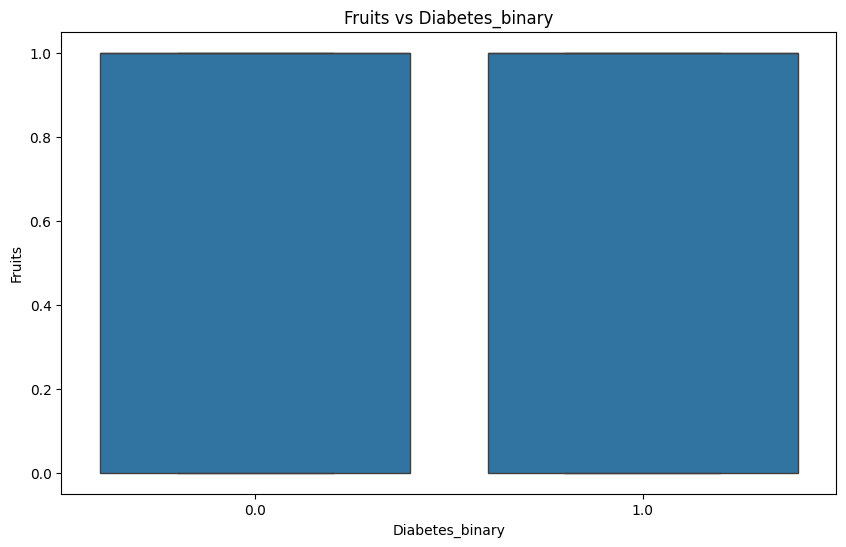

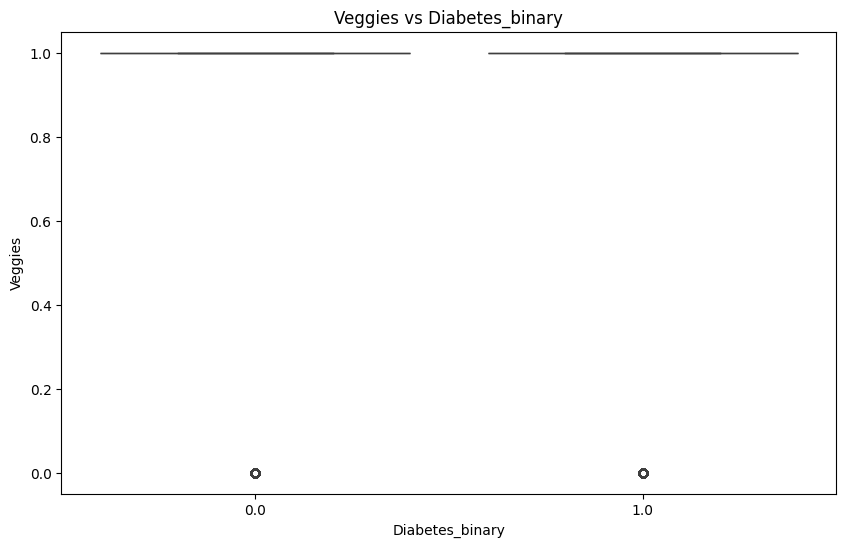

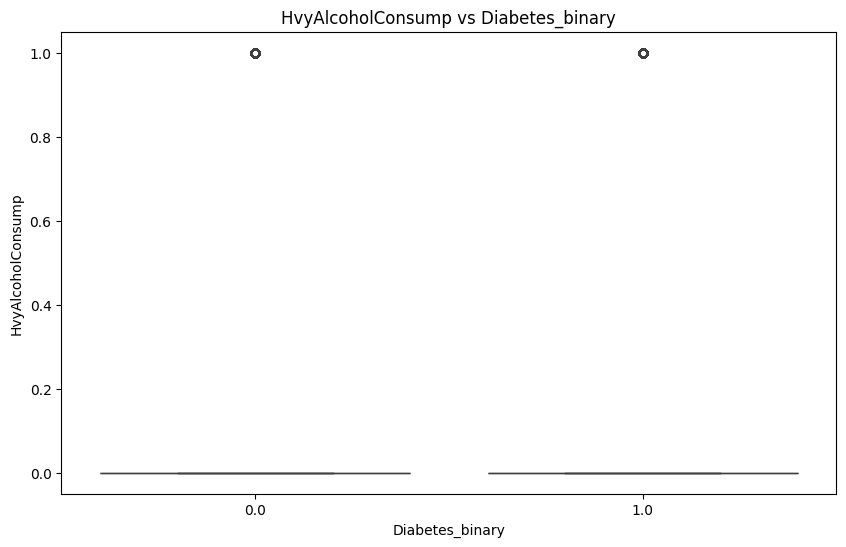

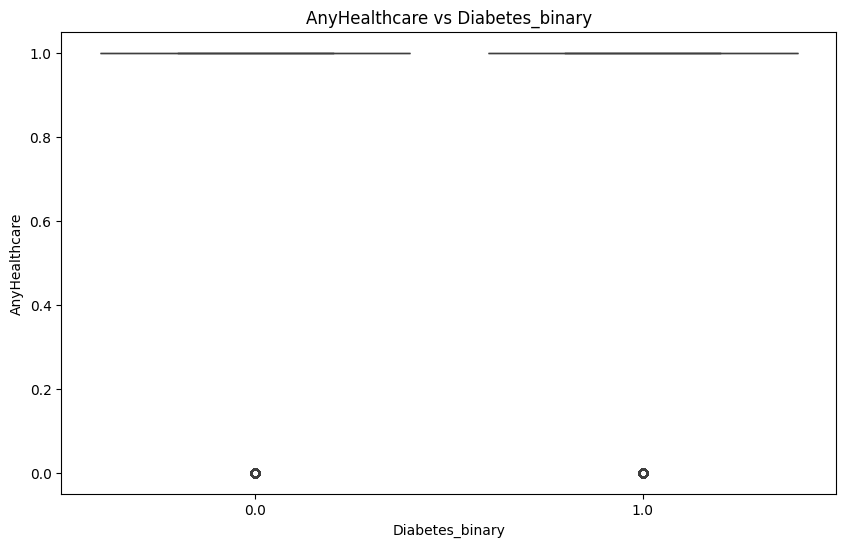

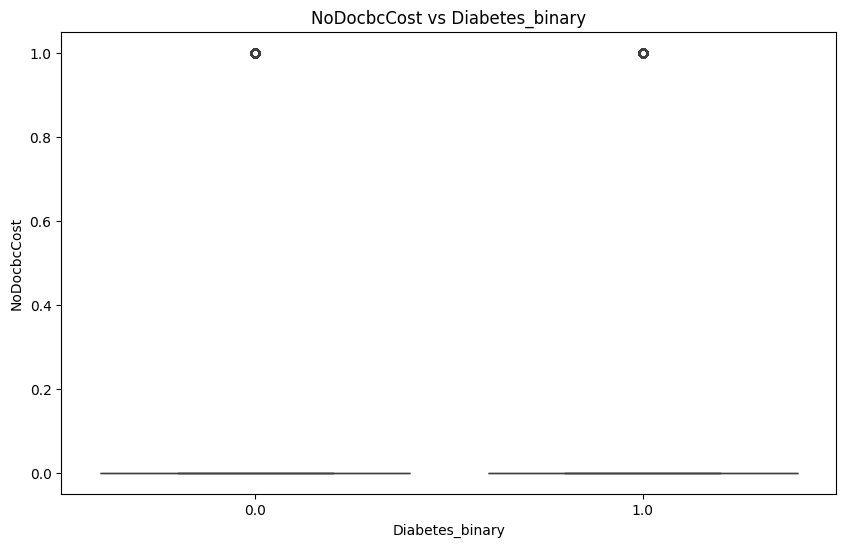

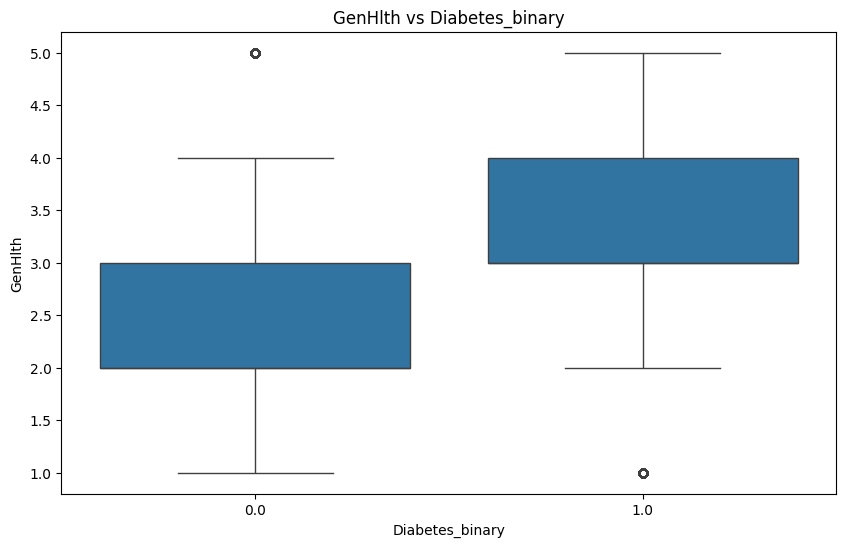

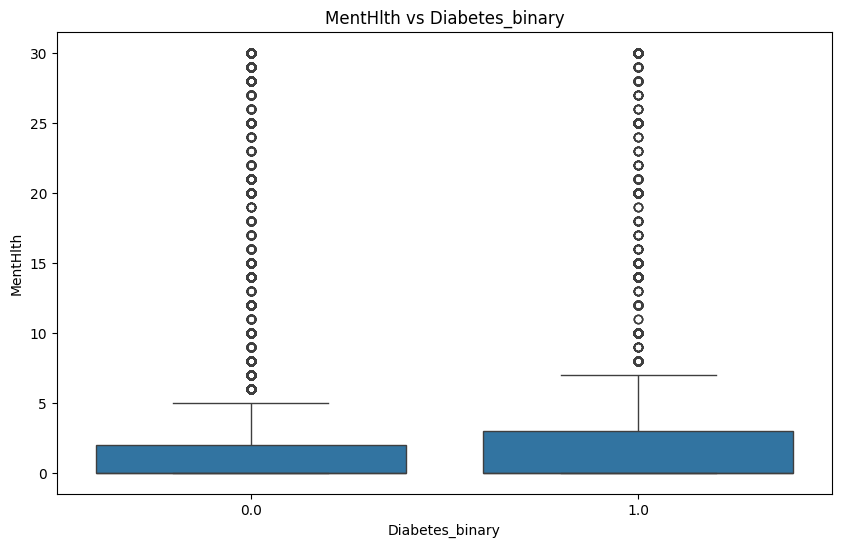

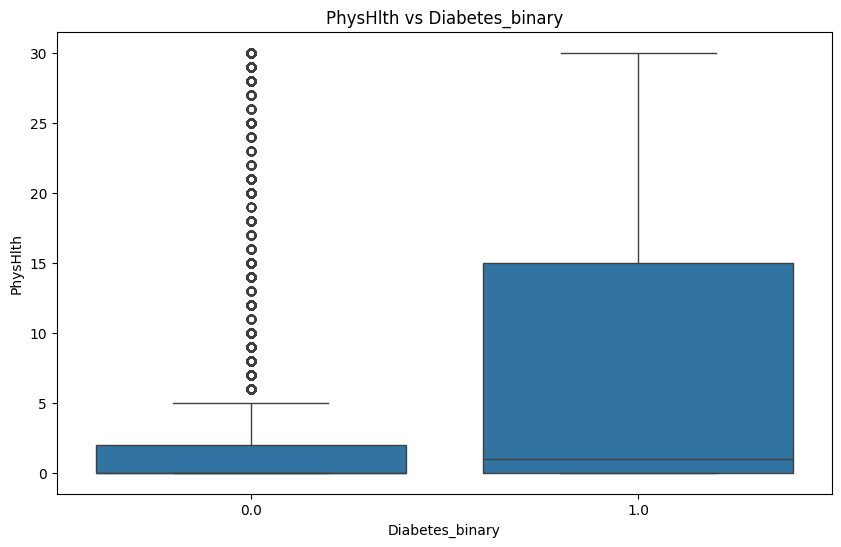

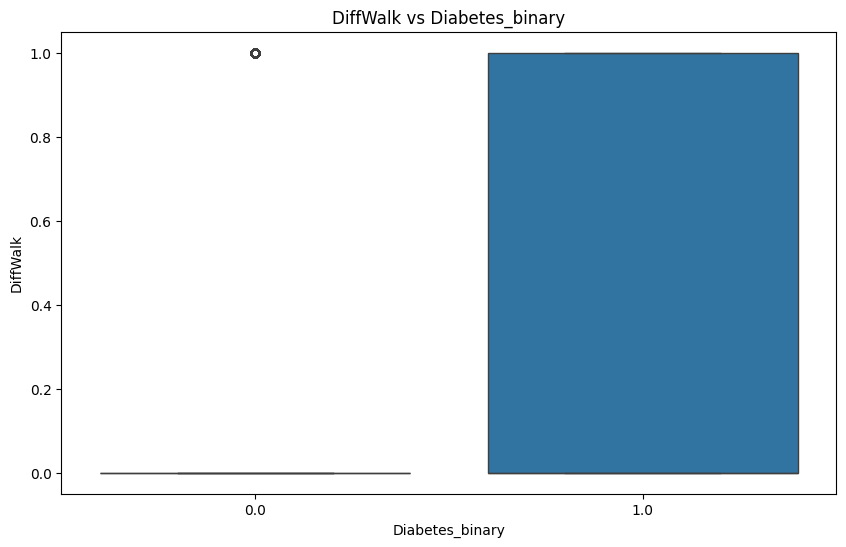

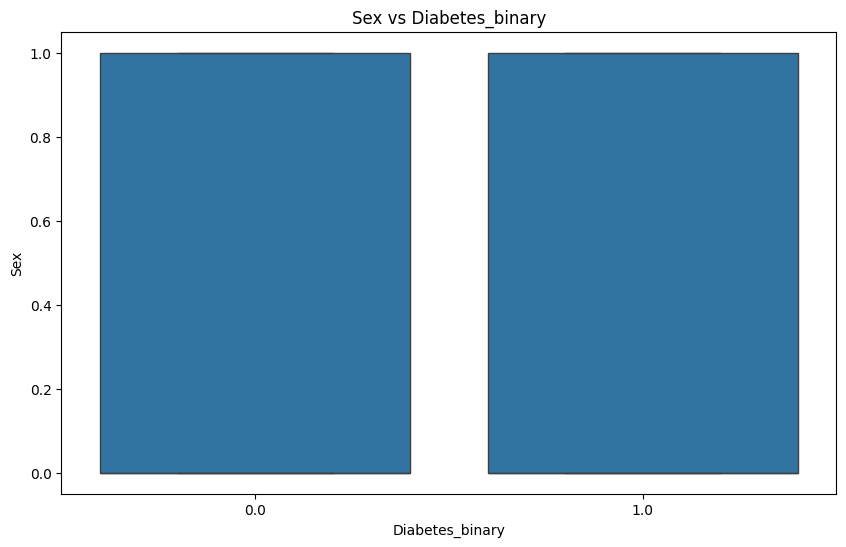

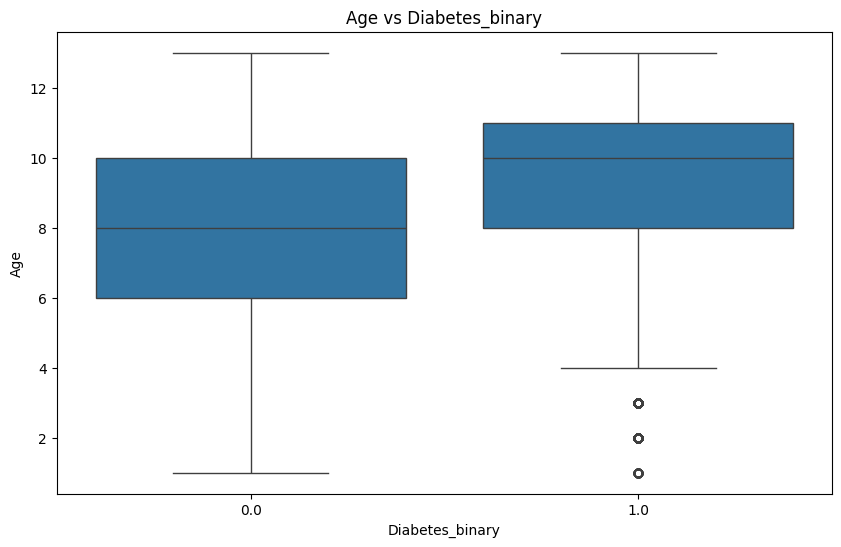

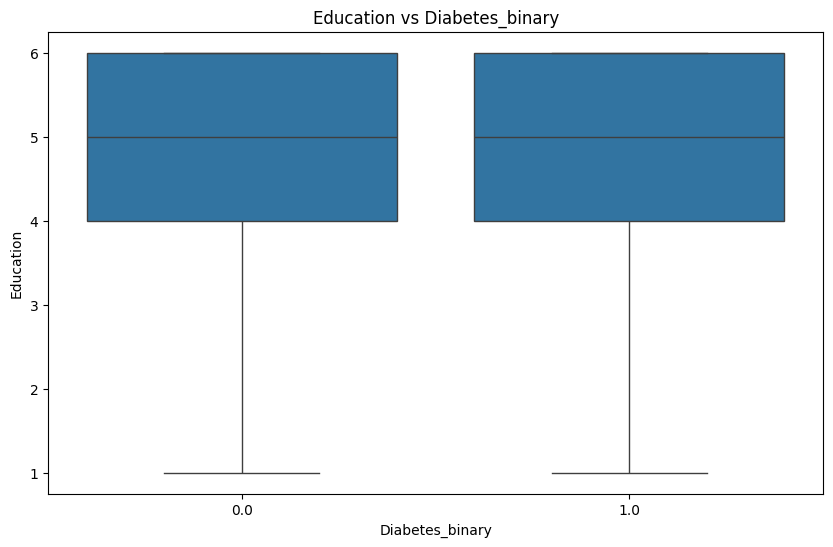

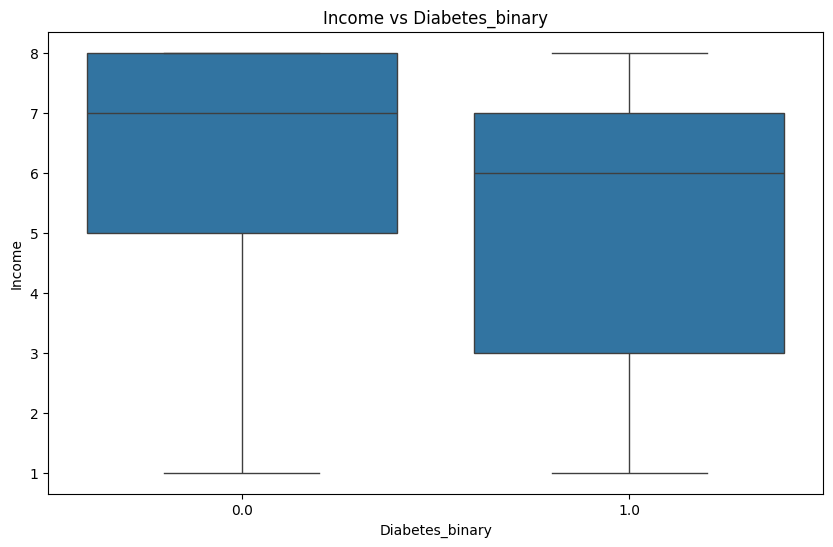

In [ ]:
# Boxplot numerik vs target
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Diabetes_binary', y=feature, data=df)
    plt.title(f'{feature} vs Diabetes_binary')
    plt.show()

cara baca:

Variabel yang Ditampilkan:

- Sumbu Y: 'fnlwgt' (final weight) dan fitur lainnya. disini fokus pada fnlweight dulu
- Sumbu X: 'income' dengan dua kategori (<=50K dan >50K)


Struktur Box Plot:

- Kotak menunjukkan interquartile range (IQR) - dari kuartil pertama (Q1) ke kuartil ketiga (Q3)
- Garis horizontal di dalam kotak adalah median
- Whiskers (garis vertikal) menunjukkan range data di luar IQR
- Titik-titik di atas whiskers adalah outlier


Perbandingan antara Dua Kategori Income:

- Kedua kategori income menunjukkan distribusi 'fnlwgt' yang sangat mirip
- Median (garis tengah kotak) untuk kedua kategori hampir sama
- IQR (ukuran kotak) juga sangat mirip untuk kedua kategori


Outlier:

- Kedua kategori memiliki banyak outlier yang ditunjukkan oleh titik-titik di atas whiskers
- Outlier tersebar dari sekitar 0.6 x 10^6 hingga 1.4 x 10^6 untuk kedua kategori


Distribusi:

- Distribusi 'fnlwgt' cenderung miring ke atas (right-skewed) untuk kedua kategori income
- Mayoritas nilai 'fnlwgt' terkonsentrasi di bawah 0.4 x 10^6


Interpretasi:

- Tidak ada perbedaan signifikan dalam distribusi 'fnlwgt' antara orang dengan pendapatan <=50K dan >50K
- Nilai 'fnlwgt' tidak tampak menjadi prediktor kuat untuk kategori pendapatan


Implikasi:

- 'fnlwgt' mungkin tidak terlalu informatif dalam membedakan antara dua kategori pendapatan
- Faktor-faktor lain mungkin lebih berpengaruh dalam menentukan kategori pendapatan


Catatan:

- 'fnlwgt' adalah bobot statistik yang menunjukkan berapa banyak orang di populasi yang direpresentasikan oleh satu record
- Nilai yang tinggi menunjukkan bahwa record tersebut mewakili lebih banyak orang dalam populasi



Kesimpulannya, berdasarkan plot ini, 'fnlwgt' tidak menunjukkan perbedaan distribusi yang jelas antara dua kategori pendapatan, yang mengindikasikan bahwa variabel ini mungkin tidak terlalu berguna sebagai prediktor tunggal untuk income dalam model prediktif.

In [ ]:
# Stacked bar plot kategorikal vs target
for feature in categorical_features:
    if feature != 'Diabetes_binary':
        plt.figure(figsize=(18, 6))
        df_temp = df.groupby([feature, 'Diabetes_binary']).size().unstack()
        df_temp_perc = df_temp.div(df_temp.sum(axis=1), axis=0)
        df_temp_perc.plot(kind='bar', stacked=True)
        plt.title(f'{feature} vs Diabetes_binary')
        plt.xlabel(feature)
        plt.ylabel('Percentage')
        plt.legend(title='Diabetes_binary', loc='upper right')
        plt.xticks(rotation=45)
        plt.show()

catatan:

Observasi Penting:

- 'Self-emp-inc' (self-employed incorporated) memiliki proporsi tertinggi untuk pendapatan >50K
- 'Never-worked' dan 'Without-pay' hampir seluruhnya memiliki pendapatan <=50K
- Pekerjaan pemerintah (Federal-gov, Local-gov, State-gov) memiliki proporsi pendapatan >50K yang cukup signifikan


Insight Spesifik:

- Sekitar 40% pekerja 'Federal-gov' memiliki pendapatan >50K
- 'Private' sector, yang mungkin merupakan kategori terbesar, memiliki proporsi pendapatan >50K yang lebih rendah dibanding pekerjaan pemerintah
- 'Self-emp-not-inc' (self-employed not incorporated) memiliki proporsi pendapatan >50K yang lebih rendah dibanding 'Self-emp-inc'


Implikasi untuk Analisis:

- 'Workclass' tampaknya menjadi prediktor yang baik untuk level pendapatan
- Kategori seperti 'Never-worked' dan 'Without-pay' mungkin bisa digabungkan karena pola yang sangat mirip
- Perbedaan antara jenis pekerjaan pemerintah mungkin penting untuk dipertahankan dalam analisis


Pertimbangan untuk Modeling:

- 'Workclass' bisa menjadi fitur yang berguna dalam model prediksi pendapatan
Mungkin perlu teknik encoding khusus untuk menangkap nuansa antar kategori

### Identifikasi Outlier

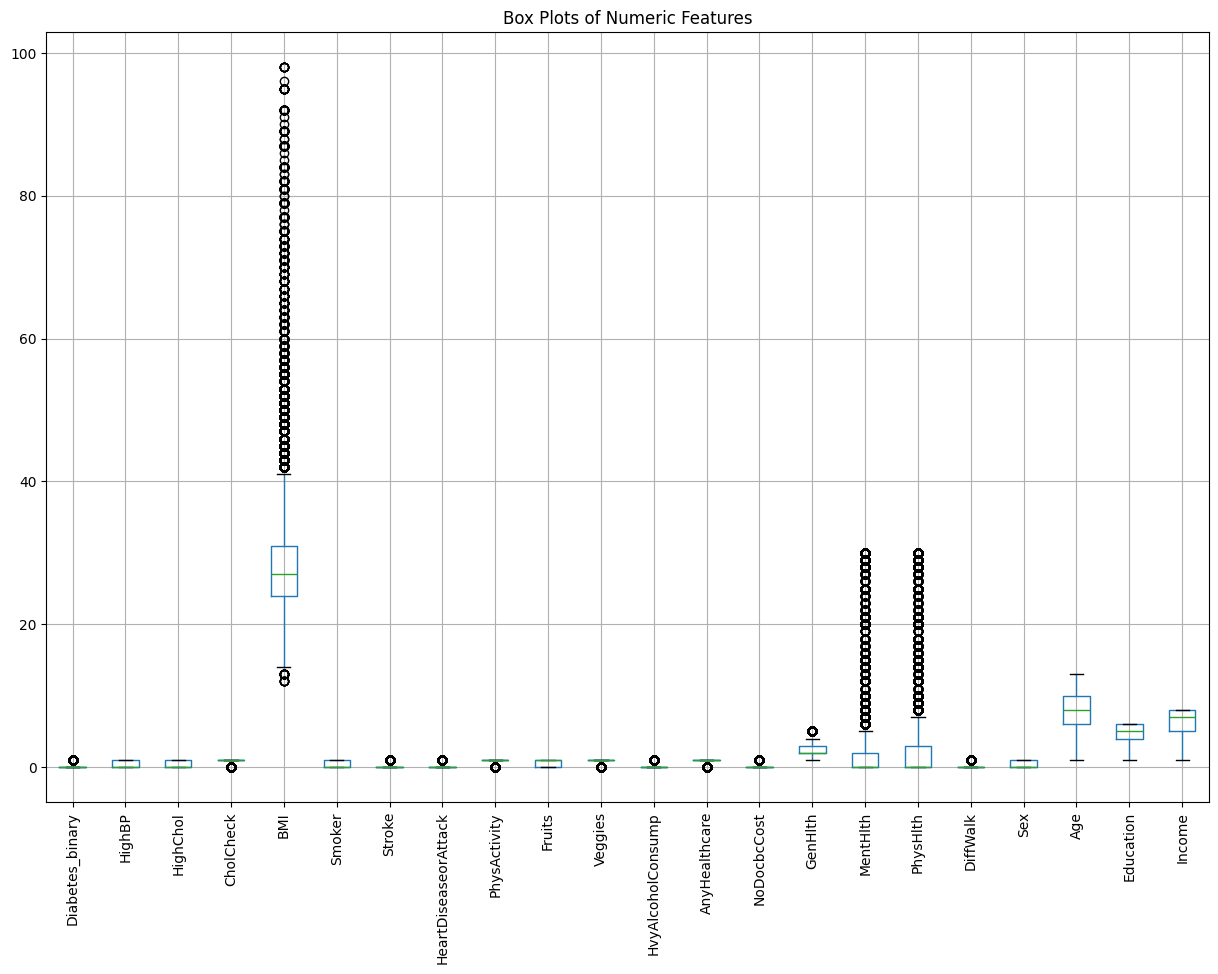

In [ ]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

penjelasan:
Analisis per Fitur:

a. fnlwgt:

- Memiliki range nilai terbesar
- Banyak outlier di atas whisker atas
- Distribusi miring ke kanan (right-skewed)
- IQR (kotak) relatif kecil dibanding range keseluruhan

b. age, education_num, hours_per_week:

- Range nilai relatif kecil
- Distribusi terlihat lebih seimbang
- Sedikit atau tidak ada outlier yang terlihat

c. capital_gain dan capital_loss:

- Mayoritas nilai terkonsentrasi di sekitar 0
- Beberapa outlier signifikan di atas
- Menunjukkan bahwa sebagian besar orang tidak memiliki capital gain/loss, tapi beberapa memiliki nilai yang sangat tinggi

Implikasi untuk Analisis:

- Mungkin perlu normalisasi atau standardisasi fitur sebelum modeling, terutama untuk fnlwgt
- Perlu pertimbangan khusus untuk menangani outlier di fnlwgt, capital_gain, dan capital_loss
- Fitur seperti age, education_num, dan hours_per_week mungkin lebih mudah diinterpretasi dalam model


Potensi Preprocessing:

- Transformasi log mungkin berguna untuk fnlwgt, capital_gain, dan capital_loss
- Binning atau kategorisasi mungkin bermanfaat untuk capital_gain dan capital_loss


Insight Bisnis:

- Distribusi fnlwgt menunjukkan variasi besar dalam representasi populasi
- Pola capital_gain dan capital_loss menunjukkan ketimpangan ekonomi dalam sampel

**kesimpulan: kita memakai decision tree, sehingga tidak perlu transformasi log**

## Unit 3: J.62DMI00.006.1 - Memvalidasi Data
Tujuan: Memastikan kualitas dan integritas data sebelum analisis lebih lanjut.

### 3. Periksa Missing Values

In [ ]:
# Hitung jumlah missing values
missing_values = df.isnull().sum()

# Hitung persentase missing values
missing_percentage = 100 * df.isnull().sum() / len(df)

# Gabungkan informasi missing values
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

print(missing_table)

                      Total  Percent
Diabetes_binary           0      0.0
HighBP                    0      0.0
HighChol                  0      0.0
CholCheck                 0      0.0
BMI                       0      0.0
Smoker                    0      0.0
Stroke                    0      0.0
HeartDiseaseorAttack      0      0.0
PhysActivity              0      0.0
Fruits                    0      0.0
Veggies                   0      0.0
HvyAlcoholConsump         0      0.0
AnyHealthcare             0      0.0
NoDocbcCost               0      0.0
GenHlth                   0      0.0
MentHlth                  0      0.0
PhysHlth                  0      0.0
DiffWalk                  0      0.0
Sex                       0      0.0
Age                       0      0.0
Education                 0      0.0
Income                    0      0.0


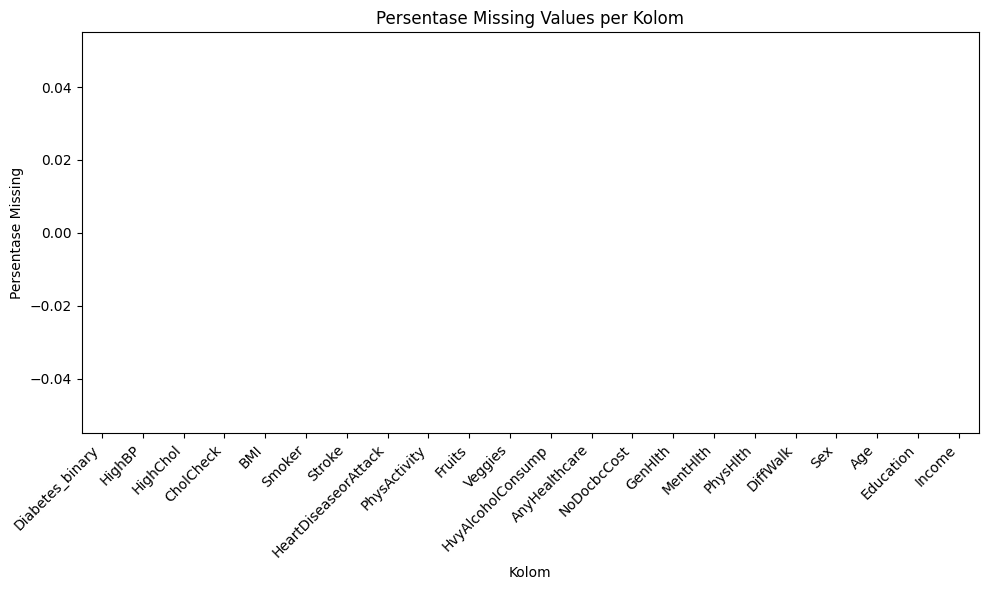

In [ ]:
# Visualisasi missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Persentase Missing Values per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### periksa duplikat

In [ ]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Jumlah baris duplikat: 24206

Contoh baris duplikat:
     Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
5                0.0     1.0       1.0        1.0  25.0     1.0     0.0   
25               0.0     0.0       0.0        1.0  32.0     0.0     0.0   
29               0.0     0.0       1.0        1.0  31.0     1.0     0.0   
44               0.0     0.0       1.0        1.0  31.0     1.0     0.0   
52               1.0     1.0       1.0        1.0  27.0     1.0     0.0   
53               0.0     0.0       0.0        1.0  31.0     0.0     0.0   
57               0.0     0.0       1.0        1.0  24.0     1.0     0.0   
70               0.0     1.0       1.0        1.0  27.0     1.0     0.0   
80               0.0     1.0       0.0        1.0  28.0     0.0     0.0   
113              0.0     1.0       0.0        1.0  27.0     0.0     0.0   

     HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
5                     0.0           1.0   

### Validasi Tipe Data

In [ ]:
# Tampilkan tipe data setiap kolom
print(df.dtypes)

# Periksa apakah ada nilai non-numerik dalam kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if len(non_numeric) > 0:
        print(f"\nNilai non-numerik dalam kolom {col}:")
        print(non_numeric[col].unique())

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


### validasi nilai range

In [ ]:
# Periksa range nilai untuk kolom numerik
for col in numeric_columns:
    print(f"\nRange nilai untuk {col}:")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")

# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Range nilai untuk Diabetes_binary:
Min: 0.0, Max: 1.0

Range nilai untuk HighBP:
Min: 0.0, Max: 1.0

Range nilai untuk HighChol:
Min: 0.0, Max: 1.0

Range nilai untuk CholCheck:
Min: 0.0, Max: 1.0

Range nilai untuk BMI:
Min: 12.0, Max: 98.0

Range nilai untuk Smoker:
Min: 0.0, Max: 1.0

Range nilai untuk Stroke:
Min: 0.0, Max: 1.0

Range nilai untuk HeartDiseaseorAttack:
Min: 0.0, Max: 1.0

Range nilai untuk PhysActivity:
Min: 0.0, Max: 1.0

Range nilai untuk Fruits:
Min: 0.0, Max: 1.0

Range nilai untuk Veggies:
Min: 0.0, Max: 1.0

Range nilai untuk HvyAlcoholConsump:
Min: 0.0, Max: 1.0

Range nilai untuk AnyHealthcare:
Min: 0.0, Max: 1.0

Range nilai untuk NoDocbcCost:
Min: 0.0, Max: 1.0

Range nilai untuk GenHlth:
Min: 1.0, Max: 5.0

Range nilai untuk MentHlth:
Min: 0.0, Max: 30.0

Range nilai untuk PhysHlth:
Min: 0.0, Max: 30.0

Range nilai untuk DiffWalk:
Min: 0.0, Max: 1.0

Range nilai untuk Sex:
Min: 0.0, Max: 1.0

Range nilai untuk Age:
Min: 1.0, Max: 13.0

Range nilai untuk 

### periksa konsistensi data

In [ ]:
# Contoh: Periksa konsistensi antara 'education' dan 'education_num'
Age_Stroke_Risk_mapping = df.groupby('Age')['Stroke'].mean().sort_values()
print("\nPemetaan rata-rata 'Stroke' untuk setiap 'Age':")
print(Age_Stroke_Risk_mapping)


Pemetaan rata-rata 'Stroke' untuk setiap 'Age':
Age
1.0     0.003684
2.0     0.003817
3.0     0.007462
4.0     0.009911
5.0     0.014173
6.0     0.018568
7.0     0.027438
8.0     0.035191
9.0     0.042534
10.0    0.050320
11.0    0.066162
12.0    0.080788
13.0    0.099983
Name: Stroke, dtype: float64


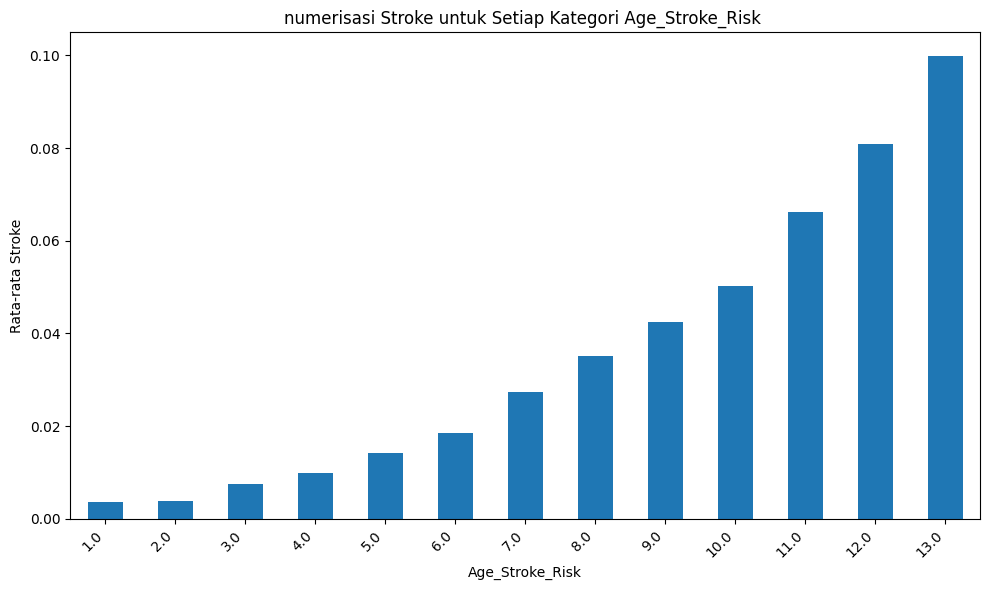

In [ ]:
# Visualisasi konsistensi
plt.figure(figsize=(10, 6))
Age_Stroke_Risk_mapping.plot(kind='bar')
plt.title('numerisasi Stroke untuk Setiap Kategori Age_Stroke_Risk ')
plt.xlabel('Age_Stroke_Risk')
plt.ylabel('Rata-rata Stroke')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### ringkasan validasi (bisa ditulis dalam catatan):
Missing Values:

Kolom mana yang memiliki missing values?
Berapa persentase missing values di setiap kolom?

b. Duplikat:

Apakah ada baris duplikat? Jika ya, berapa banyak?

c. Tipe Data:

Apakah semua kolom memiliki tipe data yang sesuai?
Adakah nilai non-numerik dalam kolom numerik?

d. Range Nilai:

Apakah range nilai untuk setiap kolom masuk akal?
Adakah outlier yang perlu diperhatikan?

e. Konsistensi Data:

Apakah ada inkonsistensi antara 'education' dan 'education_num'?
Adakah kategori yang tidak masuk akal atau salah eja?

f. Rekomendasi:

Langkah-langkah apa yang perlu diambil untuk membersihkan data?
Apakah ada fitur yang perlu ditransformasi atau di-encode?

contoh jawaban rekomendasi:

Penanganan Missing Values:

- Untuk kolom 'workclass', 'occupation', dan 'native_country' yang memiliki missing values, rekomendasi:

  a) Impute dengan modus (nilai yang paling sering muncul) untuk setiap kolom.
  
  b) Atau, buat kategori baru 'Unknown' untuk missing values.

- Justifikasi: Metode ini mempertahankan informasi tanpa menghilangkan data.


Penanganan Outlier:

- Untuk 'capital_gain' dan 'capital_loss', rekomendasi:
  a) Gunakan winsorization (membatasi nilai ekstrem ke persentil tertentu, misalnya 1% dan 99%).
  
  b) Atau, log-transform untuk mengurangi skewness.

- Justifikasi: Mengurangi pengaruh outlier ekstrem tanpa menghilangkan data.


Encoding Variabel Kategorikal:

- Untuk 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country':

  a) Gunakan one-hot encoding untuk variabel dengan kardinalitas rendah.

  b) Gunakan target encoding untuk variabel dengan kardinalitas tinggi seperti 'native_country'.

- Justifikasi: Memungkinkan model untuk memahami variabel kategorikal dengan lebih baik.


Feature Engineering:

- Buat fitur baru 'age_group' berdasarkan 'age'.

- Kombinasikan 'capital_gain' dan 'capital_loss' menjadi 'net_capital'.

- Justifikasi: Menyederhanakan informasi dan potensial meningkatkan prediktabilitas.


Normalisasi/Standardisasi:

- Standardisasi fitur numerik seperti 'age', 'fnlwgt', 'education_num', 'hours_per_week'.

- Justifikasi: Memastikan semua fitur memiliki skala yang sebanding, penting untuk beberapa algoritma machine learning.


Penanganan Kelas Tidak Seimbang:

Gunakan teknik seperti SMOTE (Synthetic Minority Over-sampling Technique) untuk menyeimbangkan kelas target.
Justifikasi: Meningkatkan kemampuan model untuk memprediksi kelas minoritas dengan akurat.


Validasi Silang:

Implementasikan stratified k-fold cross-validation untuk memastikan representasi yang konsisten dari kedua kelas target dalam setiap fold.
Justifikasi: Meningkatkan robustness evaluasi model, terutama dengan adanya ketidakseimbangan kelas.

## Unit 4: J.62DMI00.007.1 - Menentukan Objek Data

### Identifikasi Objek Utama

- target adalah income
- untuk saat ini, semua fitur, disertakan

## Unit 5: J.62DMI00.008.1 - Membersihkan Data
Tujuan: Melakukan pembersihan data untuk meningkatkan kualitas dataset sebelum analisis dan pemodelan lebih lanjut.

### Menangani Missing Values

In [ ]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Missing values setelah pembersihan:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDo

<ipython-input-40-aa6978263c5f>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


### Menangani Outlier

In [ ]:
# def plot_boxplot(df, column):
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df[column])
#     plt.title(f'Boxplot of {column}')
#     plt.show()

# # Contoh untuk kolom numerik
# numeric_columns = df.select_dtypes(include=[np.number]).columns

# for column in numeric_columns:
#     plot_boxplot(df, column)

#     # Menangani outlier dengan IQR method
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df[column] = np.where(df[column] > upper_bound, upper_bound,
#                           np.where(df[column] < lower_bound, lower_bound, df[column]))

#     print(f"Outliers pada {column} sudah dihandel.")
#     plot_boxplot(df, column)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### Soal 4. Drop Data Duplikat

In [ ]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

# Hapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris duplikat: 24206
Jumlah baris setelah menghapus duplikat: 229474


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  MentH

### validasi hasil pembersihan

In [ ]:
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0

In [ ]:
# Simpan data yang telah dibersihkan
sys.path.append(f'{folder_name}')
df.to_csv(f'{folder_name}/adult_diabetes_cleaned.csv', index=False)
print("Data yang telah dibersihkan telah disimpan sebagai 'adult_income_cleaned.csv'")

Data yang telah dibersihkan telah disimpan sebagai 'adult_income_cleaned.csv'


## Unit 6: J.62DMI00.009.1 - Mengkonstruksi Data
Tujuan: Mempersiapkan dan mengorganisir data untuk analisis dan pemodelan, termasuk feature engineering dan transformasi data.

### Feature Engineering

catatan: ada potensi fitur engineering membuat korelasi tinggi.

In [ ]:
# Membuat fitur baru berdasarkan usia
df['Age_group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 60, 100], labels=['Remaja', 'Dewasa Muda', 'Dewasa', 'Paruh Baya', 'Lansia'])


# Menggabungkan capital Stroke dan HeartDiseaseorAttack
df['Chronic_conditions'] = df['Stroke'] - df['HeartDiseaseorAttack']

# Membuat fitur rasio BMI terhadap rata-rata
df['BMI_Ratio'] = df['BMI'] / df['BMI'].mean()

# Membuat fitur kategorikal baru berdasarkan education
df['Education_level'] = pd.cut(df['Education'], bins=[0, 8, 12, 16, 20], labels=['Dasar', 'Menengah', 'Sarjana', 'Pascasarjana'])

# Membuat fitur akses penuh seseorang terhadap layanan kesehatan
df['Health_Access'] = df['AnyHealthcare'] - df['NoDocbcCost']

# Mendapatkan total jumlah hari kesehatan terganggu (baik fisik maupun mental).
df['Mental_Physical_Distress'] = df['MentHlth'] + df['PhysHlth']

# Menciptakan skor kebiasaan diet sehat
df['Diet_Habits'] = df[['Fruits', 'Veggies']].sum(axis=1)

# Menunjukkan tingkat gaya hidup yang dapat mempengaruhi kesehatan.
df['High_Risk_Lifestyle'] = df[['Smoker', 'HvyAlcoholConsump']].sum(axis=1)

df['Physical_Ability'] = df[['PhysActivity', 'DiffWalk']].sum(axis=1)

df['Socioeconomic_Status'] = df[['Income', 'Education']].mean(axis=1)  # atau menggunakan rata-rata atau metode agregasi lain sesuai kebutuhan

df['Health_Behaviors'] = df[['PhysActivity', 'Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump']].sum(axis=1)

df['Education_Ratio'] = df['Education'] / df['Education'].mean()

df['Income_Ratio'] = df['Income'] / df['Income'].mean()

df['HighBMI_HighBP'] = ((df['BMI'] >= 30) & (df['HighBP'] == 1)).astype(int)

df['LowIncome_NoHealthcare'] = ((df['Income'] <= 2) & (df['AnyHealthcare'] == 0)).astype(int)

df['Age_ChronicRisk'] = ((df['Age'] > 45) & ((df['HighBP'] == 1) | (df['HighChol'] == 1))).astype(int)

df['Health_Age'] = df['Age'] + (df['GenHlth'] - 1) * 5


print(df[['Age_group','Chronic_conditions', 'BMI_Ratio', 'Education_level', 'Health_Access', 'Mental_Physical_Distress', 'Diet_Habits', 'High_Risk_Lifestyle', 'Physical_Ability', 'Socioeconomic_Status', 'Health_Behaviors', 'Education_Ratio', 'Income_Ratio', 'HighBMI_HighBP', 'LowIncome_NoHealthcare', 'Age_ChronicRisk', 'Health_Age']].head())

  Age_group  Chronic_conditions  BMI_Ratio Education_level  Health_Access  \
0    Remaja                 0.0   1.394335           Dasar            1.0   
1    Remaja                 0.0   0.871459           Dasar           -1.0   
2    Remaja                 0.0   0.976035           Dasar            0.0   
3    Remaja                 0.0   0.941176           Dasar            1.0   
4    Remaja                 0.0   0.836601           Dasar            1.0   

   Mental_Physical_Distress  Diet_Habits  High_Risk_Lifestyle  \
0                      33.0          1.0                  1.0   
1                       0.0          0.0                  1.0   
2                      60.0          1.0                  0.0   
3                       0.0          2.0                  0.0   
4                       3.0          2.0                  0.0   

   Physical_Ability  Socioeconomic_Status  Health_Behaviors  Education_Ratio  \
0               1.0                   3.5               2.0       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Diabetes_binary           229474 non-null  float64 
 1   HighBP                    229474 non-null  float64 
 2   HighChol                  229474 non-null  float64 
 3   CholCheck                 229474 non-null  float64 
 4   BMI                       229474 non-null  float64 
 5   Smoker                    229474 non-null  float64 
 6   Stroke                    229474 non-null  float64 
 7   HeartDiseaseorAttack      229474 non-null  float64 
 8   PhysActivity              229474 non-null  float64 
 9   Fruits                    229474 non-null  float64 
 10  Veggies                   229474 non-null  float64 
 11  HvyAlcoholConsump         229474 non-null  float64 
 12  AnyHealthcare             229474 non-null  float64 
 13  NoDocbcCost               229474 n

In [ ]:
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   

    Age  Education  Income Age_group  Chronic_conditions  BMI_Ratio  \
0   9.0        4.0     3.0    Remaja                 0.0   1.394335   
1   7.0        6.0     1.0    Remaja                 0.0   0.871459   
2   9.0        4.0     8.0    Remaja                 0.0   0.976035   
3  11.0        3.0     6.0    Remaja                 0.0   0.941176   
4  11.0        5.0     4.0    Remaja                 0.0   0.836601   

  Education_level  Health_Access  Mental_Physical_Distress  Diet_Habits  \
0           Dasar            1.0                      33.0          1.0   
1           Dasar           -1.0                       0.0          0.0   
2           Dasar            0.0                      60.0          1.0   
3           Dasar            1.0                       0.0          2.0   
4           Dasar            1.0                       3.0          2.0   

   High_Risk_Lifestyle  Physical_Ability  Socioeconomic_Status  \
0                  1.0               1.0                   3.5   
1                  1.0               1.0                   3.5   
2                  0.0               1.0                   6.0   
3                  0.0               1.0                   4.5   
4                  0.0               1.0                   4.5   

   Health_Behaviors  Education_Ratio  Income_Ratio  HighBMI_HighBP  \
0               2.0         0.803255      0.509458               1   
1               2.0         1.204882      0.169819               0   
2               1.0         0.803255      1.358554               0   
3               3.0         0.602441      1.018915               0   
4               3.0         1.004068      0.679277               0   

   LowIncome_NoHealthcare  Age_ChronicRisk  Health_Age  
0                       0                0        29.0  
1                       1                0        17.0  
2                       0                0        29.0  
3                       0                0        16.0  
4                       0                0        16.0

### transformasi data

In [ ]:
# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())

In [ ]:
Age_group = {'Remaja':1, 'Dewasa Muda':2, 'Dewasa':3, 'Paruh Baya':4, 'Lansia':5}
df['Age_group'] = df['Age_group'].map(Age_group)


Education_level = {'Dasar':1, 'Menengah':2, 'Sarjana':3, 'Pascasarjana':4}
df['Education_level'] = df['Education_level'].map(Education_level)

In [ ]:
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   

    Age  Education  Income Age_group  Chronic_conditions  BMI_Ratio  \
0   9.0        4.0     3.0         1                 0.0   1.394335   
1   7.0        6.0     1.0         1                 0.0   0.871459   
2   9.0        4.0     8.0         1                 0.0   0.976035   
3  11.0        3.0     6.0         1                 0.0   0.941176   
4  11.0        5.0     4.0         1                 0.0   0.836601   

  Education_level  Health_Access  Mental_Physical_Distress  Diet_Habits  \
0               1            1.0                      33.0          1.0   
1               1           -1.0                       0.0          0.0   
2               1            0.0                      60.0          1.0   
3               1            1.0                       0.0          2.0   
4               1            1.0                       3.0          2.0   

   High_Risk_Lifestyle  Physical_Ability  Socioeconomic_Status  \
0                  1.0               1.0                   3.5   
1                  1.0               1.0                   3.5   
2                  0.0               1.0                   6.0   
3                  0.0               1.0                   4.5   
4                  0.0               1.0                   4.5   

   Health_Behaviors  Education_Ratio  Income_Ratio  HighBMI_HighBP  \
0               2.0         0.803255      0.509458               1   
1               2.0         1.204882      0.169819               0   
2               1.0         0.803255      1.358554               0   
3               3.0         0.602441      1.018915               0   
4               3.0         1.004068      0.679277               0   

   LowIncome_NoHealthcare  Age_ChronicRisk  Health_Age  
0                       0                0        29.0  
1                       1                0        17.0  
2                       0                0        29.0  
3                       0                0        16.0  
4                       0                0        16.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Diabetes_binary           229474 non-null  float64 
 1   HighBP                    229474 non-null  float64 
 2   HighChol                  229474 non-null  float64 
 3   CholCheck                 229474 non-null  float64 
 4   BMI                       229474 non-null  float64 
 5   Smoker                    229474 non-null  float64 
 6   Stroke                    229474 non-null  float64 
 7   HeartDiseaseorAttack      229474 non-null  float64 
 8   PhysActivity              229474 non-null  float64 
 9   Fruits                    229474 non-null  float64 
 10  Veggies                   229474 non-null  float64 
 11  HvyAlcoholConsump         229474 non-null  float64 
 12  AnyHealthcare             229474 non-null  float64 
 13  NoDocbcCost               229474 n

### rubah menjadi numerik

In [ ]:
# df['nama_kolom'] = df['nama_kolom'].astype(str).astype(float)
df['Education_level'] = df['Education_level'].astype(str).astype(float)
df['Age_group'] = df['Age_group'].astype(str).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Diabetes_binary           229474 non-null  float64
 1   HighBP                    229474 non-null  float64
 2   HighChol                  229474 non-null  float64
 3   CholCheck                 229474 non-null  float64
 4   BMI                       229474 non-null  float64
 5   Smoker                    229474 non-null  float64
 6   Stroke                    229474 non-null  float64
 7   HeartDiseaseorAttack      229474 non-null  float64
 8   PhysActivity              229474 non-null  float64
 9   Fruits                    229474 non-null  float64
 10  Veggies                   229474 non-null  float64
 11  HvyAlcoholConsump         229474 non-null  float64
 12  AnyHealthcare             229474 non-null  float64
 13  NoDocbcCost               229474 non-null  float6

In [ ]:
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   

    Age  Education  Income  Age_group  Chronic_conditions  BMI_Ratio  \
0   9.0        4.0     3.0        1.0                 0.0   1.394335   
1   7.0        6.0     1.0        1.0                 0.0   0.871459   
2   9.0        4.0     8.0        1.0                 0.0   0.976035   
3  11.0        3.0     6.0        1.0                 0.0   0.941176   
4  11.0        5.0     4.0        1.0                 0.0   0.836601   

   Education_level  Health_Access  Mental_Physical_Distress  Diet_Habits  \
0              1.0            1.0                      33.0          1.0   
1              1.0           -1.0                       0.0          0.0   
2              1.0            0.0                      60.0          1.0   
3              1.0            1.0                       0.0          2.0   
4              1.0            1.0                       3.0          2.0   

   High_Risk_Lifestyle  Physical_Ability  Socioeconomic_Status  \
0                  1.0               1.0                   3.5   
1                  1.0               1.0                   3.5   
2                  0.0               1.0                   6.0   
3                  0.0               1.0                   4.5   
4                  0.0               1.0                   4.5   

   Health_Behaviors  Education_Ratio  Income_Ratio  HighBMI_HighBP  \
0               2.0         0.803255      0.509458               1   
1               2.0         1.204882      0.169819               0   
2               1.0         0.803255      1.358554               0   
3               3.0         0.602441      1.018915               0   
4               3.0         1.004068      0.679277               0   

   LowIncome_NoHealthcare  Age_ChronicRisk  Health_Age  
0                       0                0        29.0  
1                       1                0        17.0  
2                       0                0        29.0  
3                       0                0        16.0  
4                       0                0        16.0

### cek kembali korelasi
- karena semua fitur sudah bernilai numerik, maka bisa kita cek kembali korelasi semua fitur (termasuk target yang sebelumnya kategorikal)

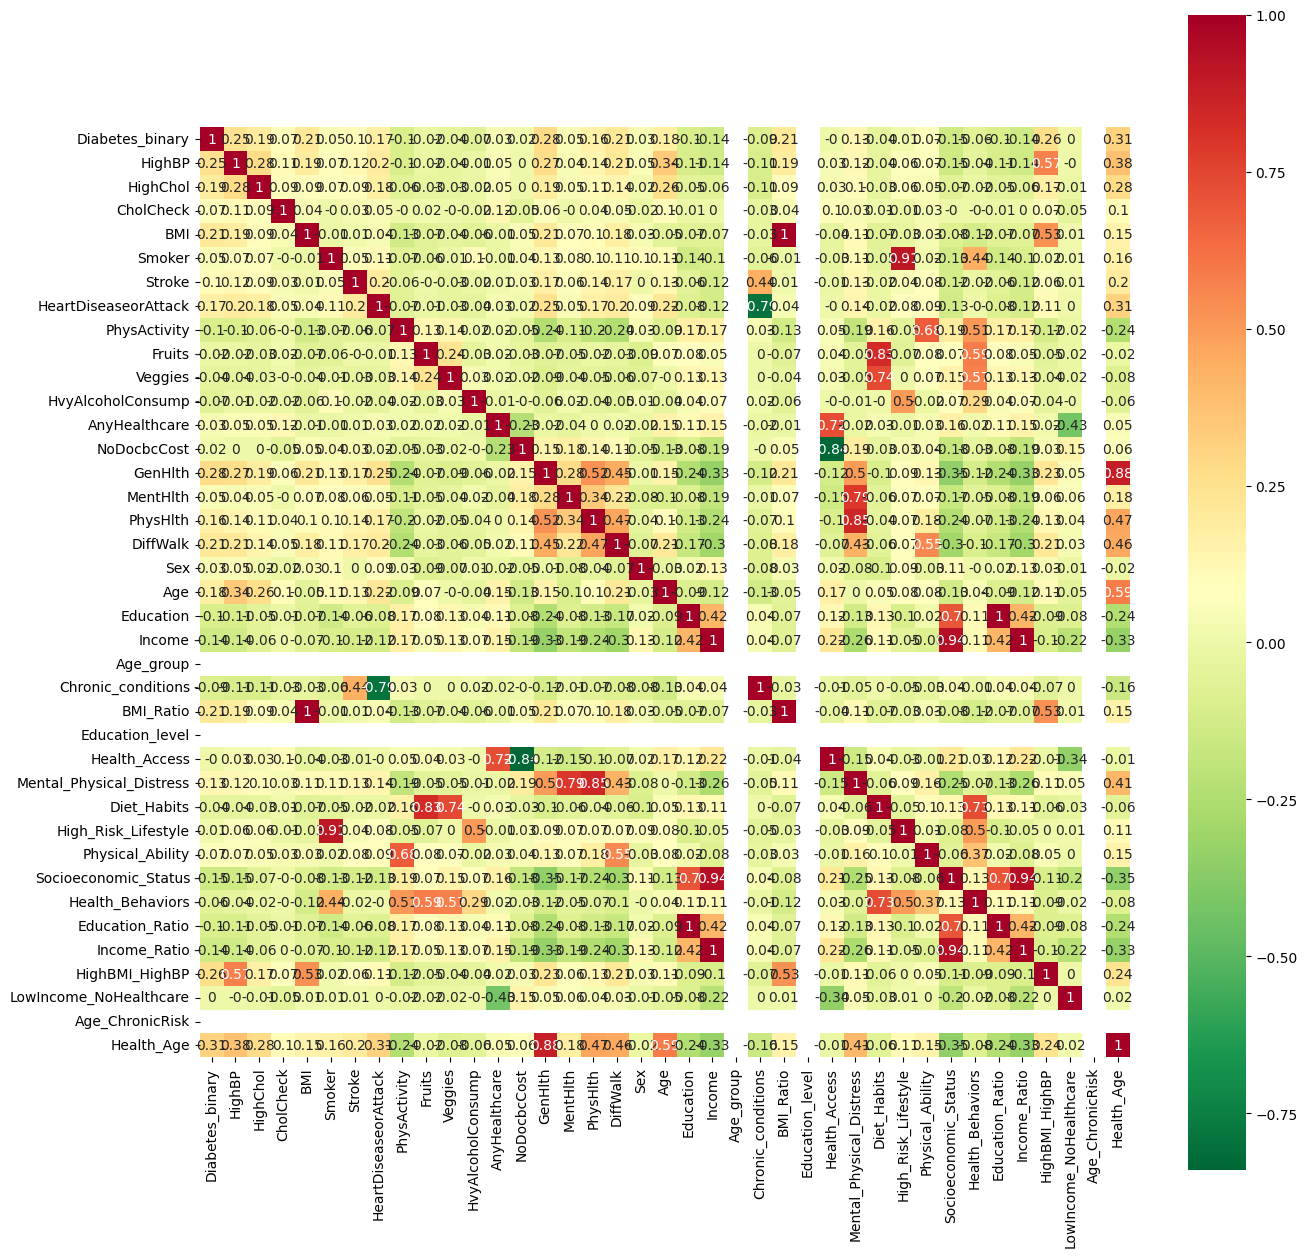

In [ ]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

catatan:
- ada beberapa yang tidak ada nilainya (karena outlier detection)
- ada fitur berkorelasi tinggi (ada yang dari feature engineering)
- tidak ada korelasi tinggi terhadap target. (jika ada, maka harus dihapus. batasan = 0.9)
- untuk konteks klasifikasi, yang dicari adalah korelasi antar fitur rendah

### Soal 5. Drop Fitur yang Bernilai Konstant

In [ ]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

In [ ]:
df

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0                        0.0           0.0     0.0      1.0   
1                        0.0           1.0     0.0      0.0   
2                        0.0           0.0     1.0      0.0   
3                        0.0           1.0     1.0      1.0   
4                        0.0           1.0     1.0      1.0   
...                      ...           ...     ...      ...   
253675                   0.0           0.0     1.0      1.0   
253676                   0.0           0.0     0.0      0.0   
253677                   0.0           1.0     1.0      0.0   
253678                   0.0           0.0     1.0      1.0   
253679                   1.0           1.0     1.0      0.0   

        HvyAlcoholConsump  AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  \
0                     0.0            1.0          0.0      5.0      18.0   
1                     0.0            0.0          1.0      3.0       0.0   
2                     0.0            1.0          1.0      5.0      30.0   
3                     0.0            1.0          0.0      2.0       0.0   
4                     0.0            1.0          0.0      2.0       3.0   
...                   ...            ...          ...      ...       ...   
253675                0.0            1.0          0.0      3.0       0.0   
253676                0.0            1.0          0.0      4.0       0.0   
253677                0.0            1.0          0.0      1.0       0.0   
253678                0.0            1.0          0.0      3.0       0.0   
253679                0.0            1.0          0.0      2.0       0.0   

        PhysHlth  DiffWalk  Sex   Age  Education  Income  Chronic_conditions  \
0           15.0       1.0  0.0   9.0        4.0     3.0                 0.0   
1            0.0       0.0  0.0   7.0        6.0     1.0                 0.0   
2           30.0       1.0  0.0   9.0        4.0     8.0                 0.0   
3            0.0       0.0  0.0  11.0        3.0     6.0                 0.0   
4            0.0       0.0  0.0  11.0        5.0     4.0                 0.0   
...          ...       ...  ...   ...        ...     ...                 ...   
253675       5.0       0.0  1.0   5.0        6.0     7.0                 0.0   
253676       0.0       1.0  0.0  11.0        2.0     4.0                 0.0   
253677       0.0       0.0  0.0   2.0        5.0     2.0                 0.0   
253678       0.0       0.0  1.0   7.0        5.0     1.0                 0.0   
253679       0.0       0.0  0.0   9.0        6.0     2.0                -1.0   

        BMI_Ratio  Health_Access  Mental_Physical_Distress  Diet_Habits  \
0        1.394335            1.0                      33.0          1.0   
1        0.871459           -1.0                       0.0          0.0   
2        0.976035            0.0                      60.0          1.0   
3        0.941176            1.0                       0.0          2.0   
4        0.836601            1.0                       3.0       

### penghapusan fitur berkorelasi tinggi

In [ ]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
data_tanpa_fitur = df.drop('Diabetes_binary', axis=1)

In [ ]:
corr_features = correlation(data_tanpa_fitur, 0.8)
print('correlated features: ', len(set(corr_features)) )
print(corr_features)

correlated features:  9
{'Income_Ratio', 'Mental_Physical_Distress', 'BMI_Ratio', 'High_Risk_Lifestyle', 'Socioeconomic_Status', 'Health_Age', 'Diet_Habits', 'Health_Access', 'Education_Ratio'}


In [ ]:
# removed correlated  features
df.drop(labels=corr_features, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Diabetes_binary         229474 non-null  float64
 1   HighBP                  229474 non-null  float64
 2   HighChol                229474 non-null  float64
 3   CholCheck               229474 non-null  float64
 4   BMI                     229474 non-null  float64
 5   Smoker                  229474 non-null  float64
 6   Stroke                  229474 non-null  float64
 7   HeartDiseaseorAttack    229474 non-null  float64
 8   PhysActivity            229474 non-null  float64
 9   Fruits                  229474 non-null  float64
 10  Veggies                 229474 non-null  float64
 11  HvyAlcoholConsump       229474 non-null  float64
 12  AnyHealthcare           229474 non-null  float64
 13  NoDocbcCost             229474 non-null  float64
 14  GenHlth                 2

In [ ]:
df.describe()

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    229474.000000  229474.000000  229474.000000  229474.000000   
mean          0.152945       0.454343       0.441640       0.959481   
std           0.359936       0.497912       0.496584       0.197173   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI        Smoker         Stroke  HeartDiseaseorAttack  \
count  229474.000000  229474.00000  229474.000000         229474.000000   
mean       28.687507       0.46580       0.044816              0.103336   
std         6.789204       0.49883       0.206899              0.304398   
min        12.000000       0.00000       0.000000              0.000000   
25%        24.000000       0.00000       0.000000              0.000000   
50%        27.000000       0.00000       0.000000              0.000000   
75%        32.000000       1.00000       0.000000              0.000000   
max        98.000000       1.00000       1.000000              1.000000   

        PhysActivity         Fruits        Veggies  HvyAlcoholConsump  \
count  229474.000000  229474.000000  229474.000000      229474.000000   
mean        0.733042       0.612675       0.794587           0.060791   
std         0.442371       0.487140       0.404004           0.238947   
min         0.000000       0.000000       0.000000           0.000000   
25%         0.000000       0.000000       1.000000           0.000000   
50%         1.000000       1.000000       1.000000           0.000000   
75%         1.000000       1.000000       1.000000           0.000000   
max         1.000000       1.000000       1.000000           1.000000   

       AnyHealthcare    NoDocbcCost        GenHlth       MentHlth  \
count  229474.000000  229474.000000  229474.000000  229474.000000   
mean        0.946011       0.092921       2.601820       3.509866   
std         0.225996       0.290323       1.064962       7.717643   
min         0.000000       0.000000       1.000000       0.000000   
25%         1.000000       0.000000       2.000000       0.000000   
50%         1.000000       0.000000       3.000000       0.000000   
75%         1.000000       0.000000       3.000000       2.000000   
max         1.000000       1.000000       5.000000      30.000000   

            PhysHlth       DiffWalk            Sex            Age  \
count  229474.000000  229474.000000  229474.000000  229474.000000   
mean        4.681219       0.185751       0.439087       8.085068   
std         9.050877       0.388906       0.496277       3.094451   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       0.000000       0.000000       6.000000   
50%         0.000000       0.000000       0.000000       8.000000   
75%         4.000000       0.000000       1.000000      10.000000   
max        30.000000       1.000000       1.000000      13.000000   

           Education         Income  Chronic_conditions  Physical_Ability  \
count  229474.000000  229474.000000       229474.000000     229474.000000   
mean        4.979741       5.888615           -0.058521          0.918793   
std         0.992989       2.092888            0.332300          0.515591   
min         1.000000       1.000000           -1.000000          0.000000   
25%         4.000000       4.000000            0.000000          1.000000   
50%         5.000000       6.000000            0.000000          1.000000   
75%         6.000000       8.000000            0.000000          1.000000   
max         6.000000       8.000000            1.000000          2.000000   

       Health_Behaviors  HighBMI_HighBP  LowIncome_NoHealthcare  
count     229474.000000   229

### cek kembali korelasi

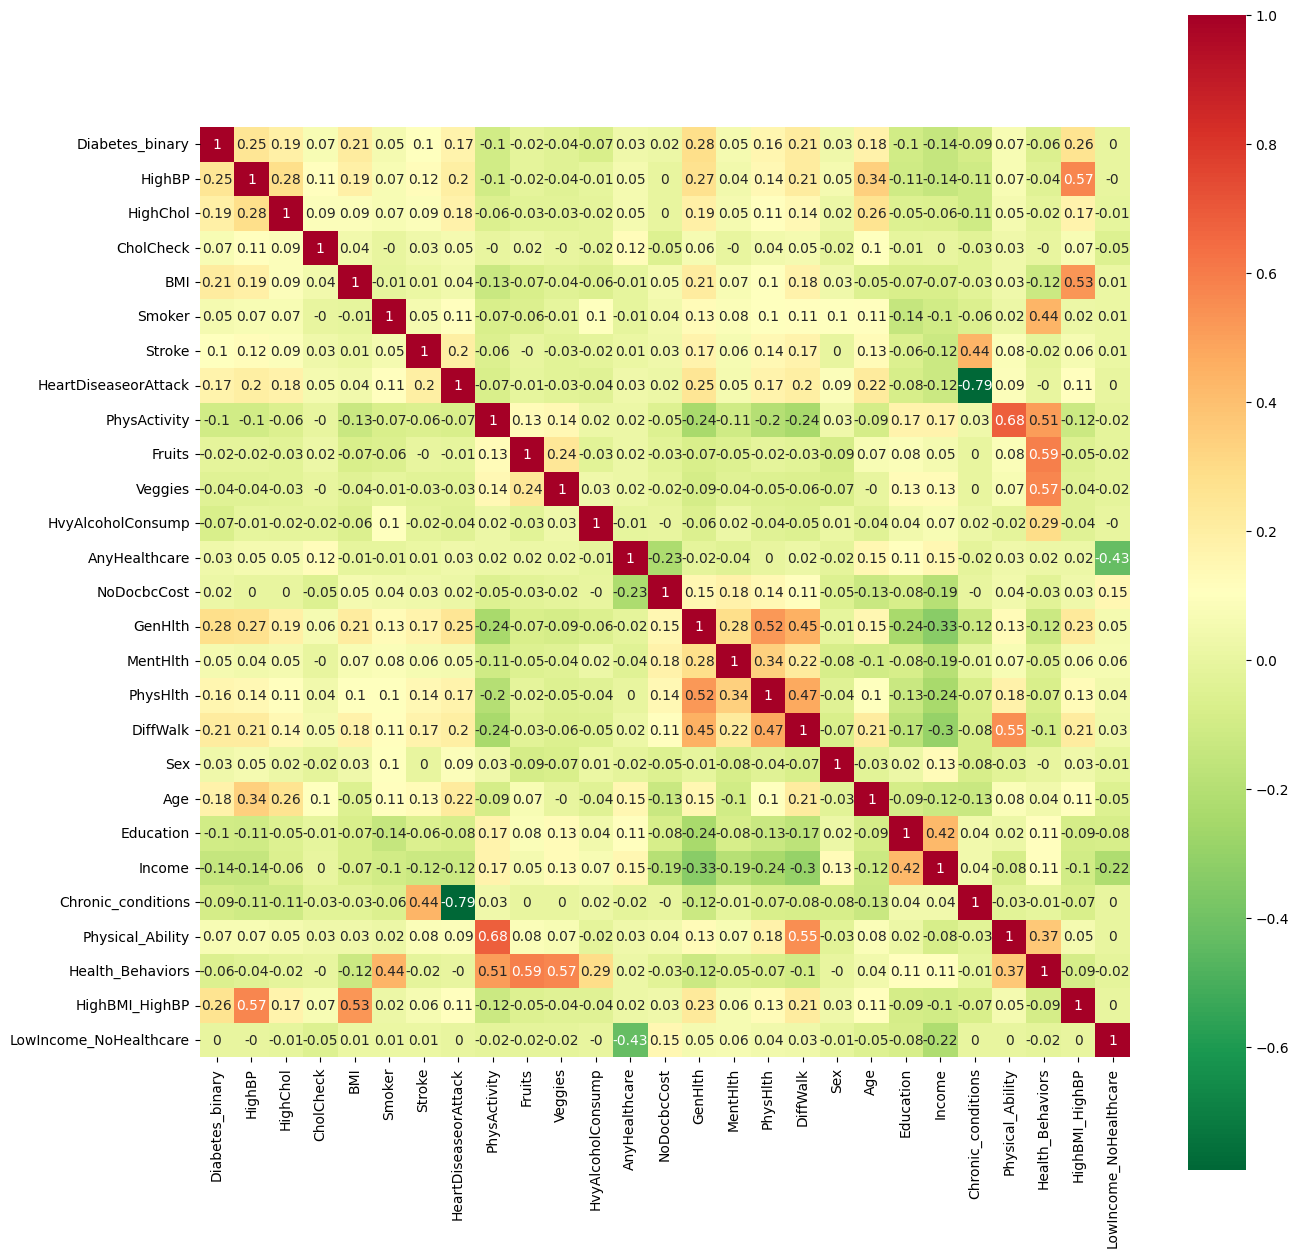

In [ ]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

## Unit 7: J.62DMI00.013.1 - Membangun Model
Tujuan: Membuat dan melatih model machine learning untuk memprediksi income berdasarkan dataset yang telah dipersiapkan.

### Soal 10. Bagi Data Menjadi Training dan Testing

In [ ]:
from sklearn.model_selection import train_test_split
# Pisahkan fitur dan target
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


### membangun dengan decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score,classification_report, confusion_matrix

# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluasi
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test,y_pred_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.7767125675440125
Precision: 0.7767125675440125
Recall: 0.7767125675440125

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     19438
         1.0       0.29      0.32      0.31      3510

    accuracy                           0.78     22948
   macro avg       0.58      0.59      0.59     22948
weighted avg       0.79      0.78      0.78     22948



kriteria:
- berapapun hasil akurasi, presisi, recall, selama nilainya di range yang sama (disini 0.77), menunjukkan bahwa preprocessing yang kita gunakan sudah benar dan sesuai

### Soal 13. Confution Matrix

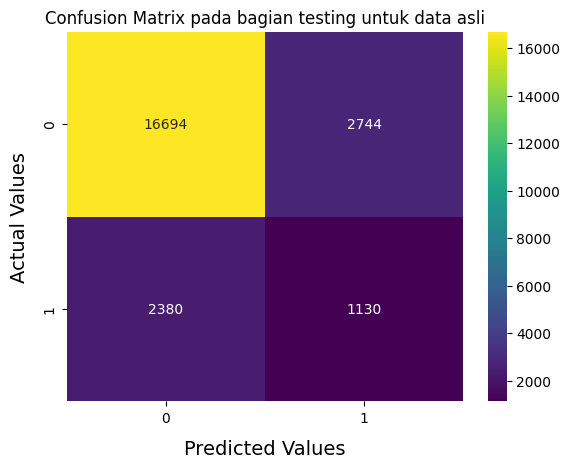

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

Actual Values : Diabetes dan Non Diabetes
Predicted Values : Diabetes dan Non Diabetes

2380 orang yang diprediksi oleh komputer tidak terindikasi diabetes (false negatif)

1130 orangnya diabetes pada data asli dan juga di prediksi komputer juga diabetes (true positif)

16694 didata asli tidak terindikasi diabeetes dan di diprediksi komputer tidak diabetes (true negatif)

2774 data asli tidak diabetes tetapi di prediksi komputer diabetes (false positif)

### feature importance

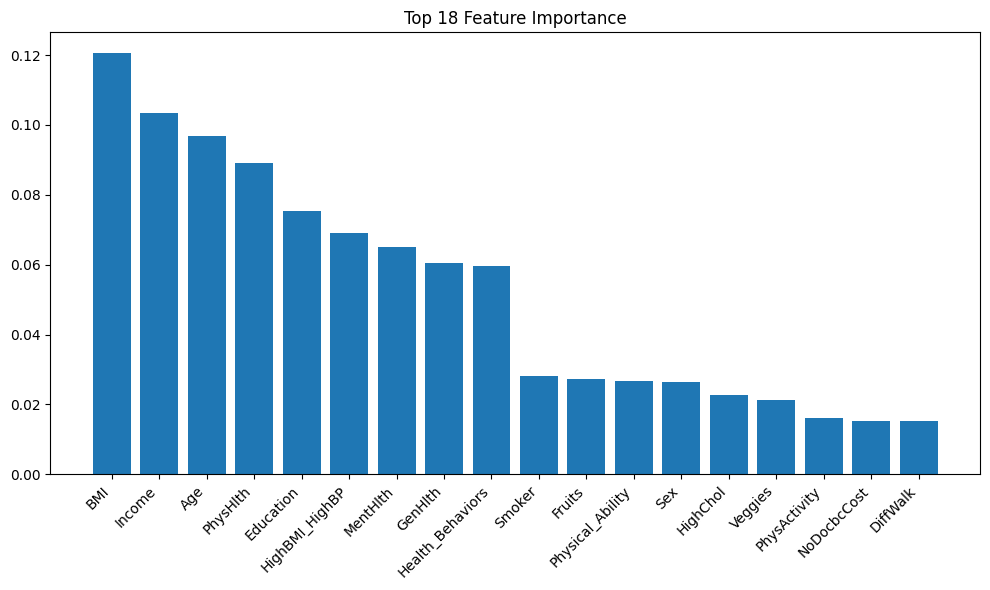

In [ ]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:18], feature_importance['importance'][:18])
plt.title('Top 18 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Soal 11. Gunakan Decision Tree dan Dapatkan Parameter Optimal hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definisikan parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Gunakan model terbaik
best_dt_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best_dt = best_dt_model.predict(X_test)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.8506531865237307


### Soal 12. Hasil Akurasi, Presisi, Recall pada Training dan Testing

In [ ]:
# Evaluasi model terbaik
print("\nBest Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Precision:", precision_score(y_test,y_pred_best_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_best_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_dt))


Best Decision Tree Performance:
Accuracy: 0.8524925919470107
Precision: 0.8524925919470107
Recall: 0.8524925919470107

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     19438
         1.0       0.61      0.10      0.17      3510

    accuracy                           0.85     22948
   macro avg       0.74      0.54      0.54     22948
weighted avg       0.82      0.85      0.80     22948



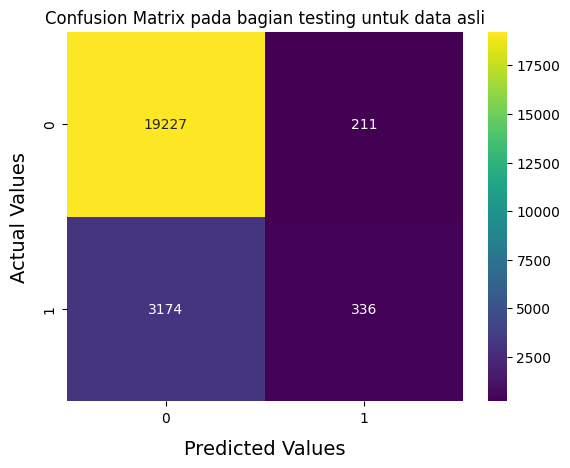

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_best_dt),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

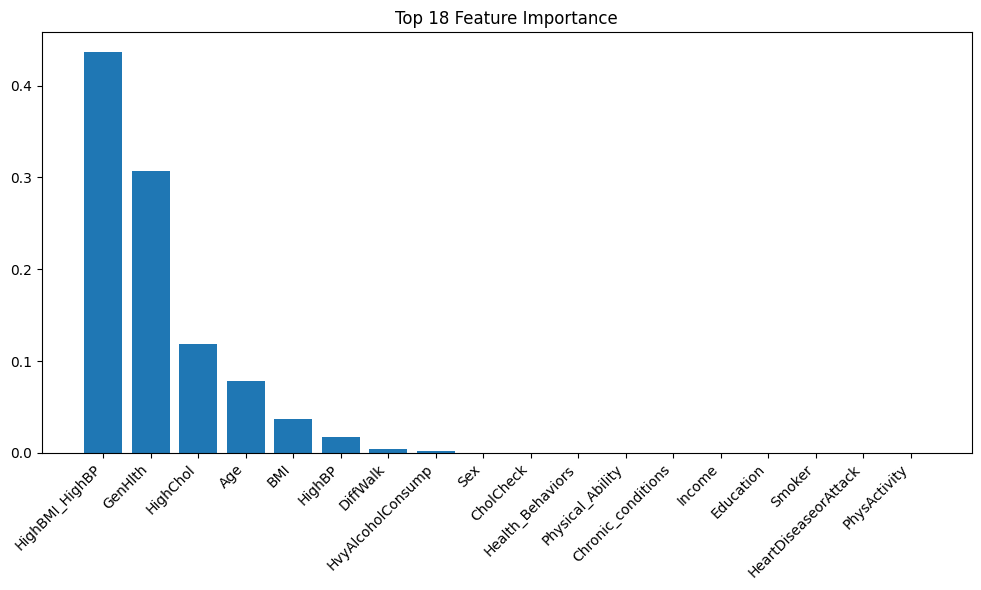

In [ ]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:18], feature_importance['importance'][:18])
plt.title('Top 18 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### simpan model terbaik

In [ ]:
import joblib

# Simpan model terbaik
joblib.dump(best_dt_model, f'{folder_name}/best_income_predictor_model.joblib')
print("Model terbaik telah disimpan sebagai 'best_income_predictor_model.joblib'")

Model terbaik telah disimpan sebagai 'best_income_predictor_model.joblib'


## cek underfitting atau overfitting untuk hyperparameter

#### Membandingkan Akurasi Training vs Testing:

In [ ]:
from sklearn.metrics import accuracy_score

# Untuk model Decision Tree terbaik
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8518055838005868
Testing Accuracy: 0.8524925919470107


Interpretasi:

- Jika train_accuracy jauh lebih tinggi dari test_accuracy, ini indikasi overfitting.
- Jika keduanya rendah dan hampir sama, ini bisa jadi indikasi underfitting.

#### learning curve

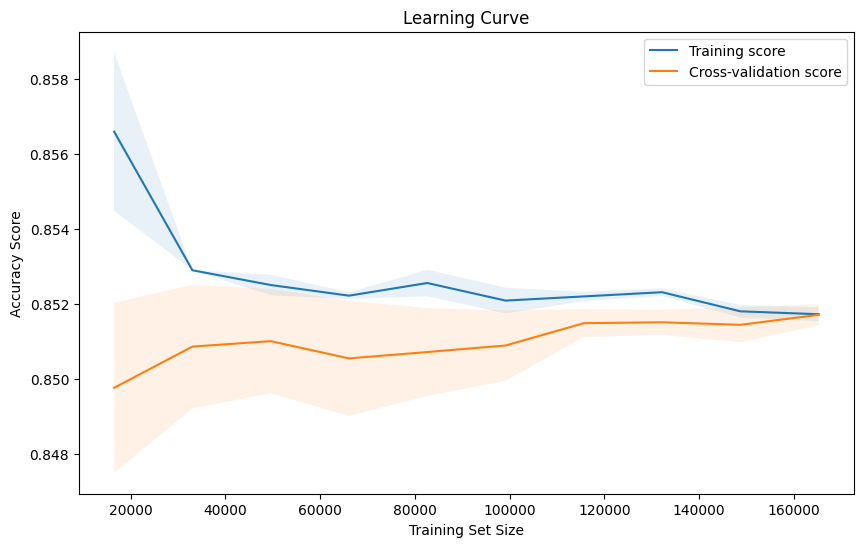

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_dt_model, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

Interpretasi:
- Jika kurva training terus naik tapi kurva testing mendatar atau turun, ini indikasi overfitting.
- Jika kedua kurva rendah dan berdekatan, ini indikasi underfitting.

#### cross validation score

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_dt_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV score:", np.std(cv_scores))

Cross-validation scores: [0.85147436 0.85176129 0.85193076 0.8513013  0.85205181]
Mean CV score: 0.8517039027993605
Standard deviation of CV score: 0.0002794916077038444


Interpretasi:

- Jika mean CV score jauh lebih rendah dari training accuracy, ini bisa jadi indikasi overfitting.
- Jika standard deviasi CV score tinggi, ini bisa menunjukkan model yang tidak stabil, yang juga bisa mengindikasikan overfitting.

### Untuk cek Overfitting tanpa hyperparamater
- kode diatas untuk cek overfitting hyperparameter
- kode dibawah menggunakan decision tree dengan maxdepth saja

#### Complexity Curve (untuk Decision Tree):

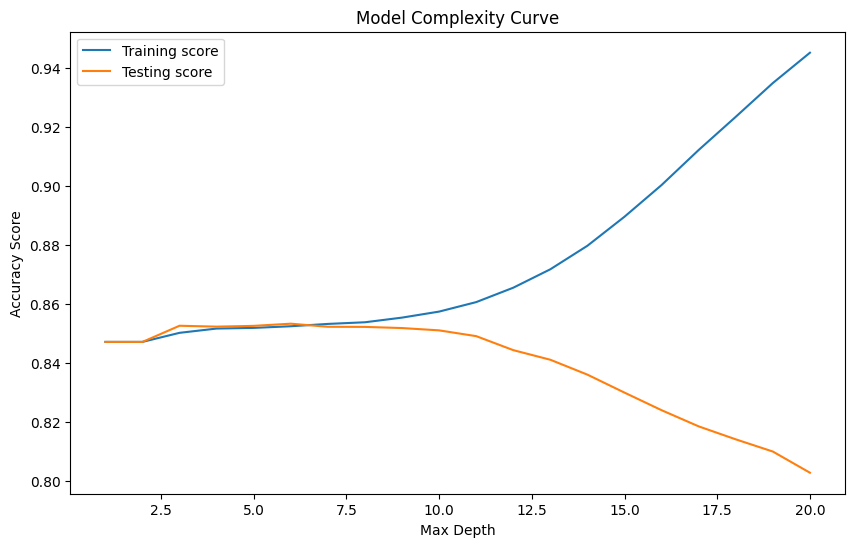

In [ ]:
max_depths = range(1, 21)  #digunakan untuk nilai integer dari 1 sampai 20
train_scores = []
test_scores = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    train_scores.append(accuracy_score(y_train, dt.predict(X_train)))
    test_scores.append(accuracy_score(y_test, dt.predict(X_test)))

plt.figure(figsize=(10,6))
plt.plot(max_depths, train_scores, label='Training score')
plt.plot(max_depths, test_scores, label='Testing score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Model Complexity Curve')
plt.legend()
plt.show()

Interpretasi:

- Jika kurva training terus naik tapi kurva testing mulai turun setelah titik tertentu, ini indikasi overfitting.
- Jika kedua kurva rendah dan berdekatan, ini indikasi underfitting.

observasi:

- Underfitting: Terlihat di bagian kiri grafik (kedalaman 1-3) dimana kedua skor rendah.
- Overfitting: Mulai terjadi setelah kedalaman sekitar 7, dimana garis biru terus naik tapi garis oranye mulai turun.
- Sweet spot (titik optimal): Berada di sekitar kedalaman 5-7, dimana testing score mencapai puncak.


Kesimpulan:

- Model dengan kedalaman sekitar 5-7 mungkin memberikan keseimbangan terbaik antara bias dan varians.
- Setelah kedalaman 7, model mulai overfitting: performa pada data training terus meningkat, tapi menurun pada data testing.
- Kedalaman pohon di atas 10 menunjukkan overfitting yang signifikan, dengan gap besar antara training dan testing score.


Rekomendasi:

- Gunakan max_depth antara 5-7 untuk model final untuk menghindari overfitting.

### visualisasi Decision tree versi standar

In [ ]:
from sklearn.tree import plot_tree

Gambar pohon keputusan telah disimpan sebagai 'decision_tree_visualization.png'


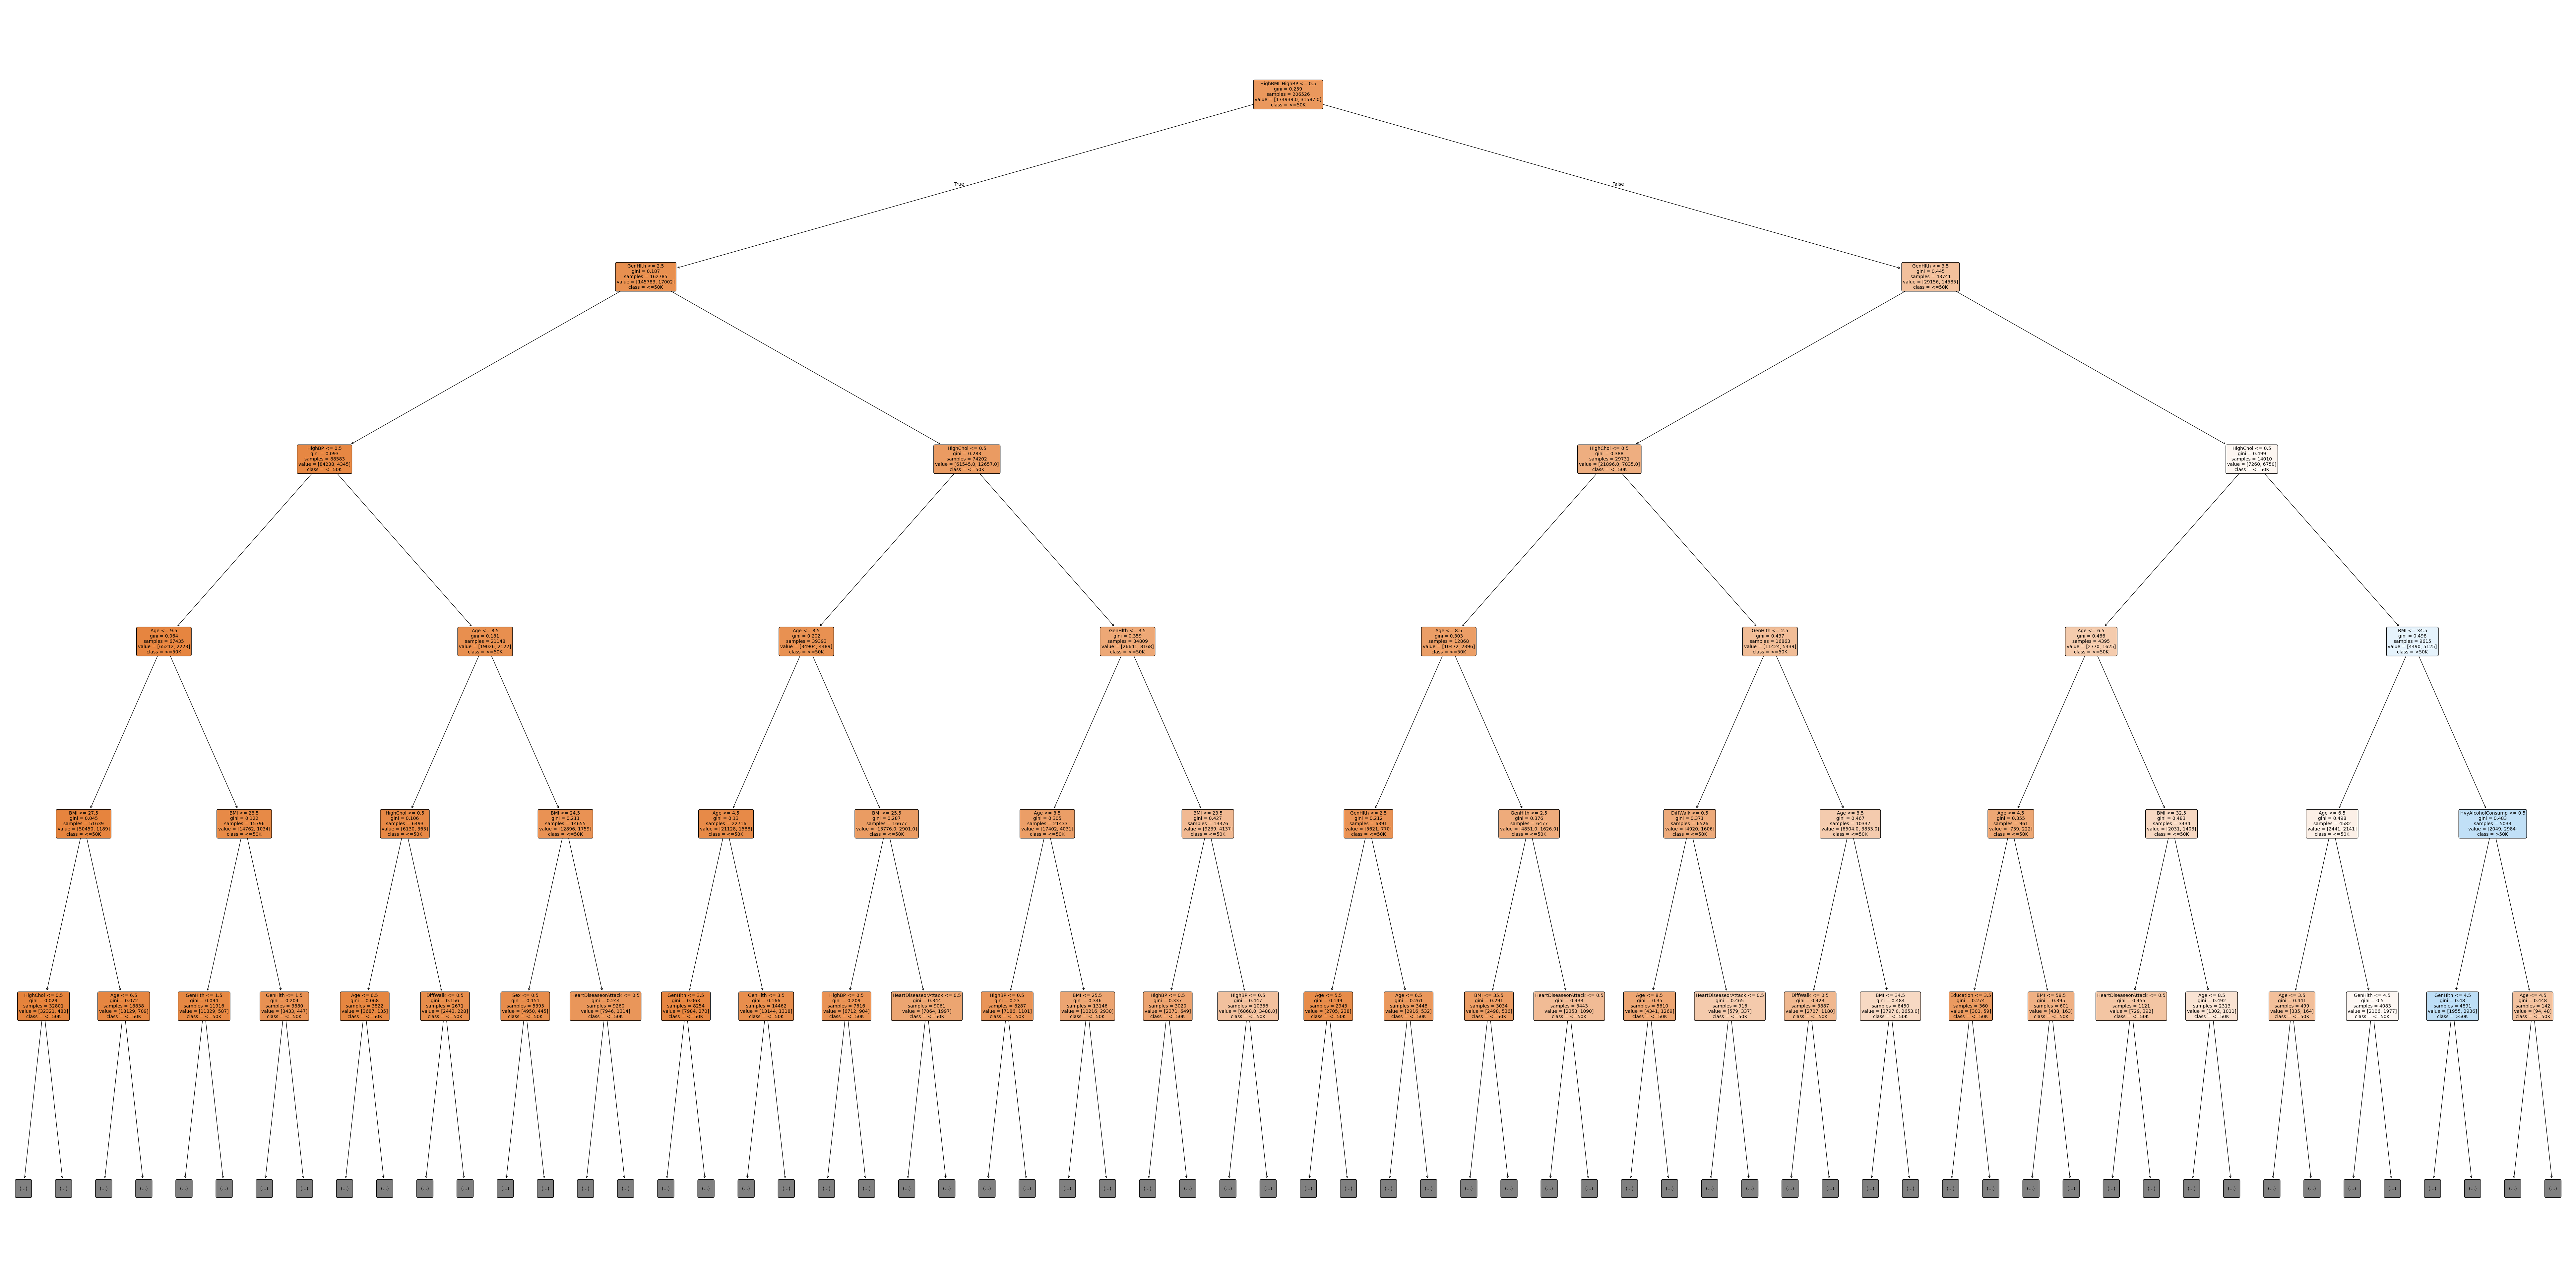

In [ ]:
# Buat gambar dengan ukuran yang sangat besar - disini maxdepth dibuat 5 agar lebih cepat terbuat
plt.figure(figsize=(100, 50))  # Ukuran dalam inci

# Plot pohon keputusan
plot_tree(dt_model, feature_names=X.columns, class_names=['<=50K', '>50K'],
          filled=True, rounded=True, fontsize=10, max_depth=5)

# Simpan gambar dengan DPI tinggi
plt.savefig(f'{folder_name}/decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print("Gambar pohon keputusan telah disimpan sebagai 'decision_tree_visualization.png'")

### visualisasi decision tree versi hyperparameter

Gambar pohon keputusan telah disimpan sebagai 'best_decision_tree_visualization.png'


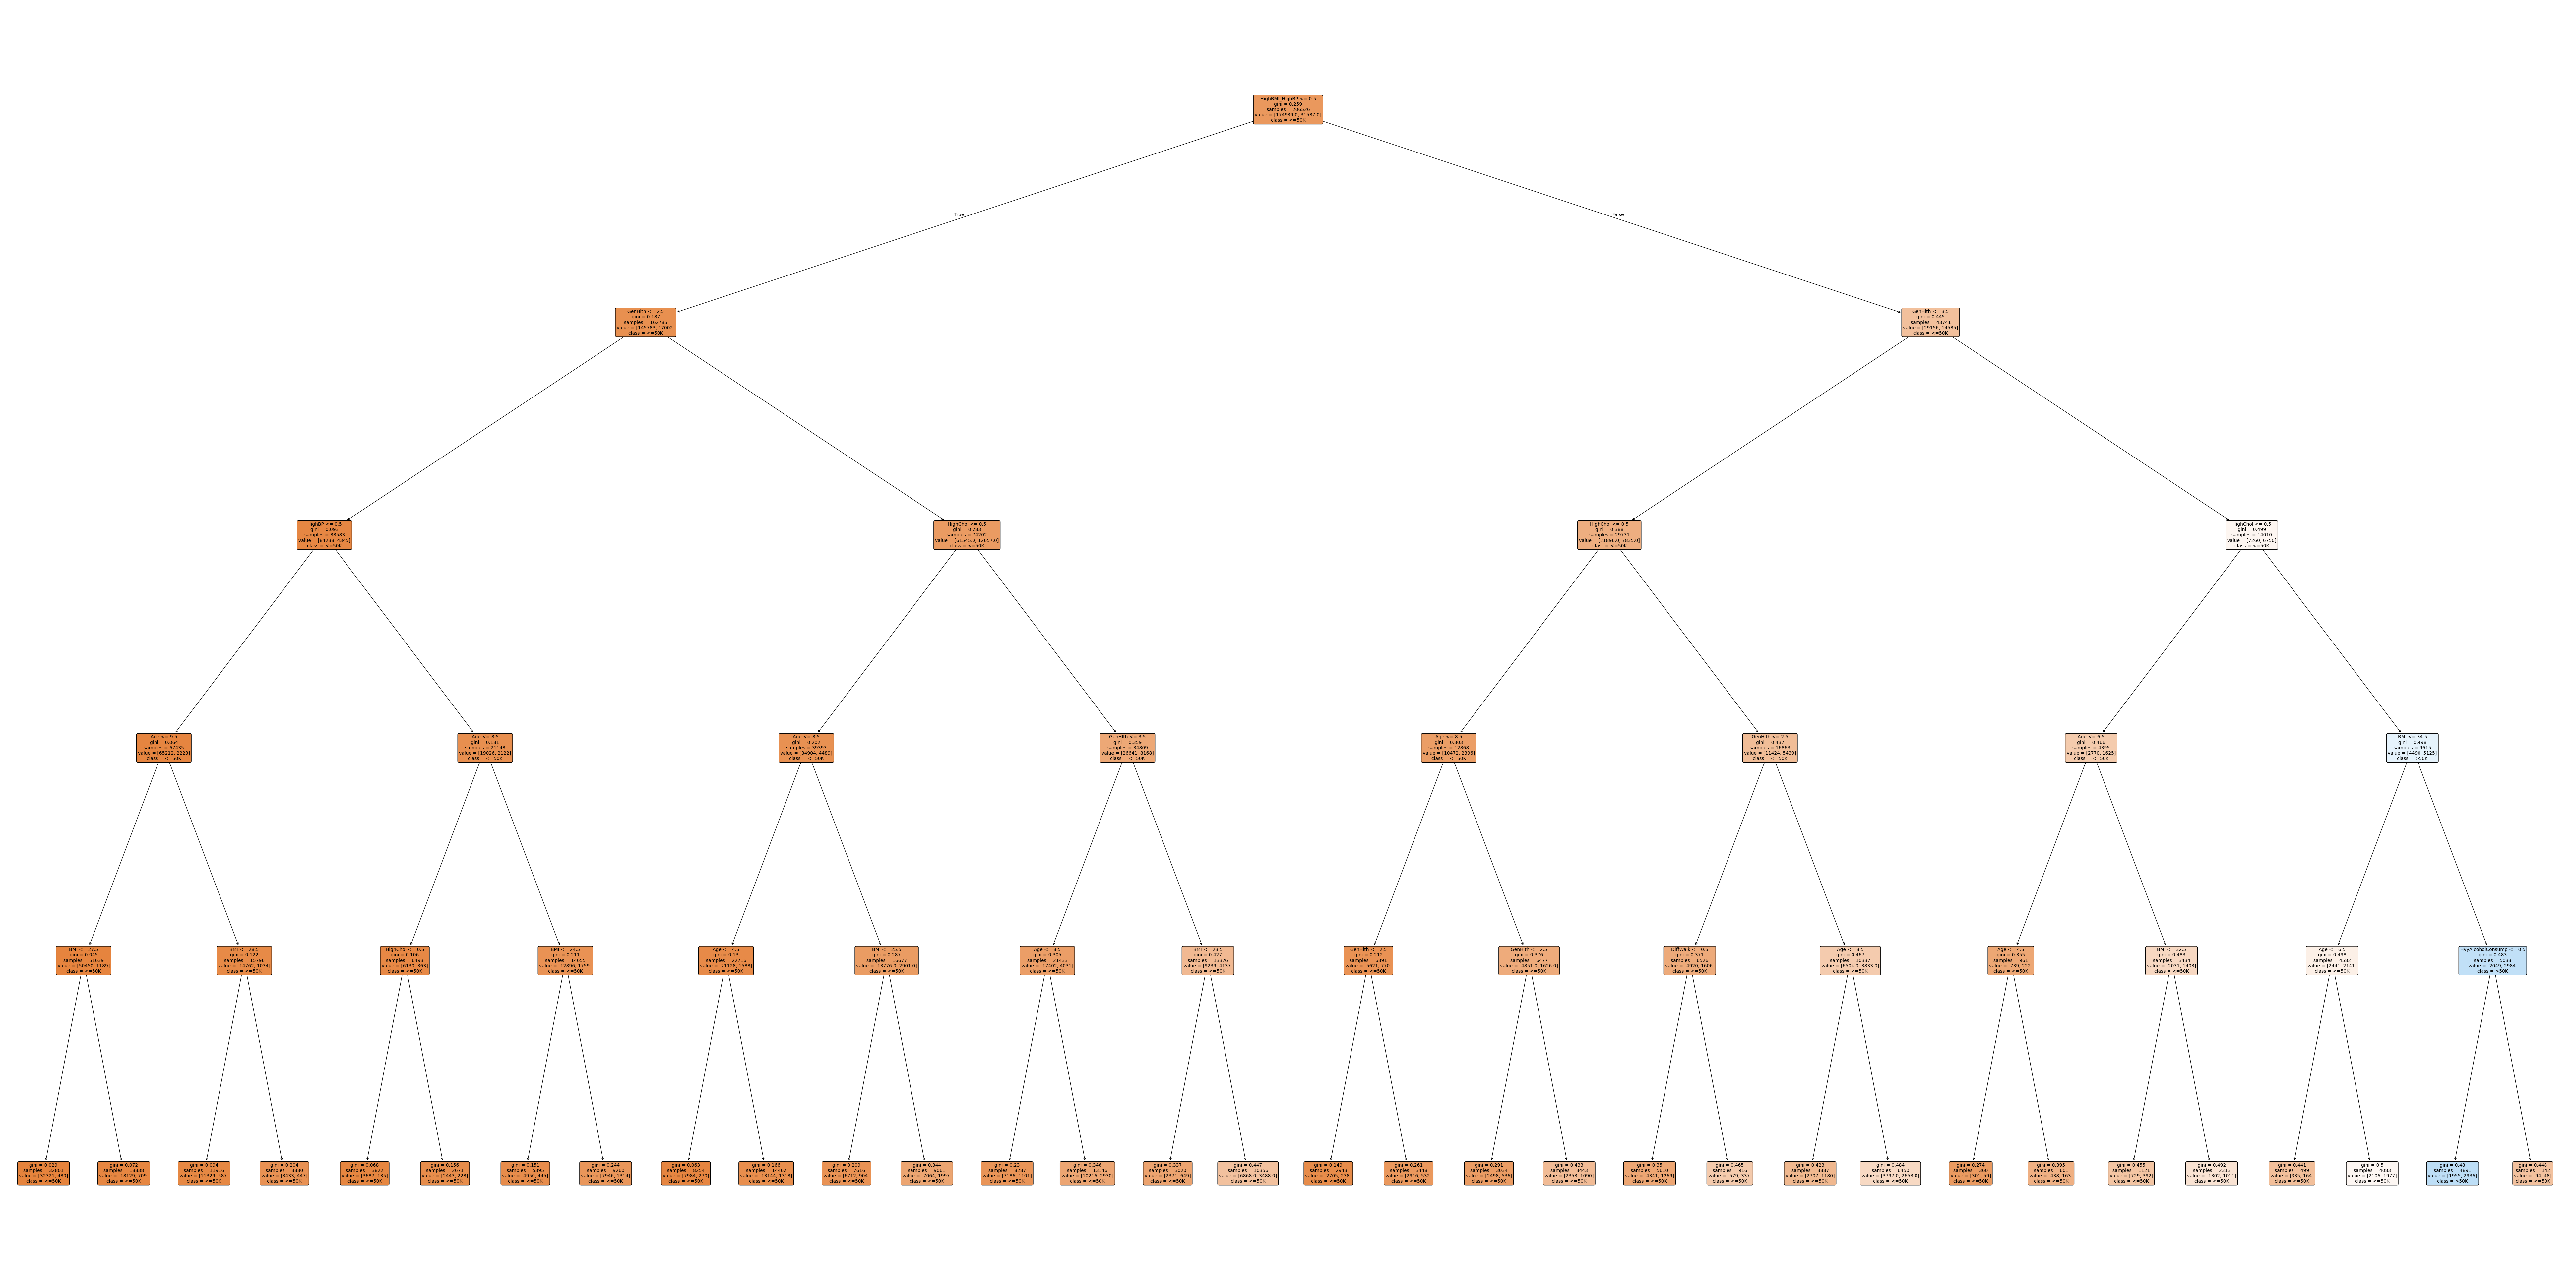

In [ ]:
# Buat gambar dengan ukuran yang sangat besar
plt.figure(figsize=(100, 50))  # Ukuran dalam inci

# Plot pohon keputusan
plot_tree(best_dt_model, feature_names=X.columns, class_names=['<=50K', '>50K'],
          filled=True, rounded=True, fontsize=10)

# Simpan gambar dengan DPI tinggi
plt.savefig(f'{folder_name}/best_decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print("Gambar pohon keputusan telah disimpan sebagai 'best_decision_tree_visualization.png'")

Gambar pohon keputusan telah disimpan sebagai 'best_decision_tree_visualization.png'


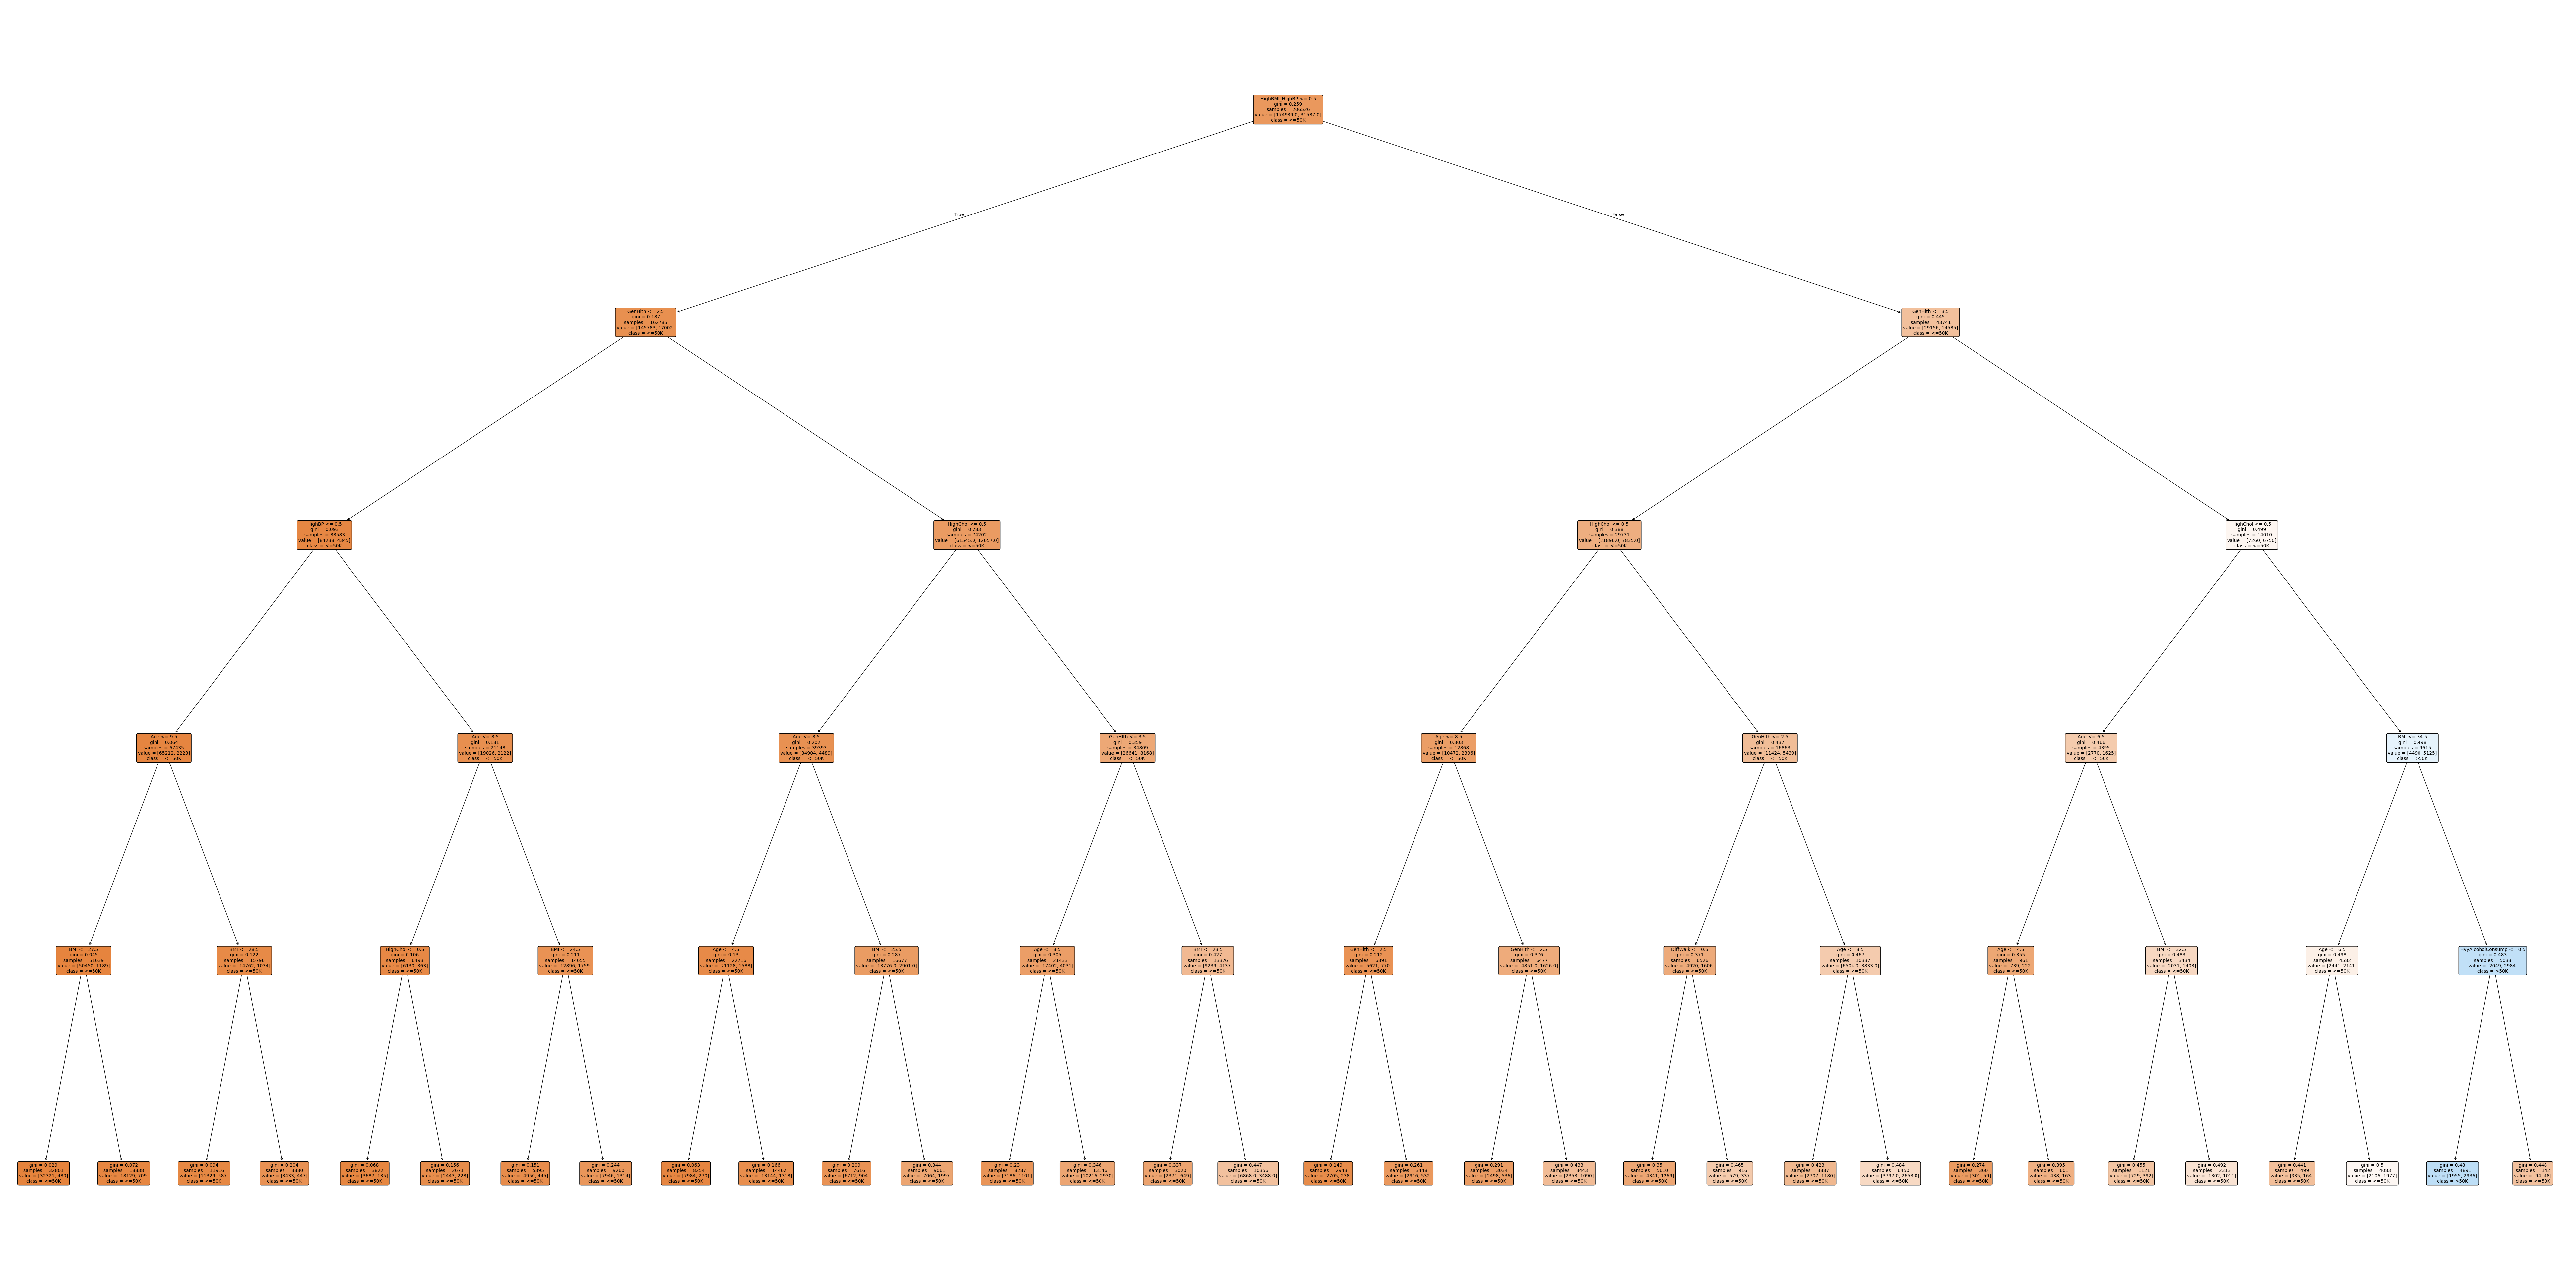

In [ ]:
# Buat gambar dengan ukuran yang sangat besar
plt.figure(figsize=(100, 50))  # Ukuran dalam inci

# Plot pohon keputusan
plot_tree(best_dt_model, feature_names=X.columns, class_names=['<=50K', '>50K'],
          filled=True, rounded=True, fontsize=10, max_depth=5)

# Simpan gambar dengan DPI tinggi
plt.savefig(f'{folder_name}/best_decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print("Gambar pohon keputusan telah disimpan sebagai 'best_decision_tree_visualization.png'")

# selesai